# บทที่ 2 - ชุดข้อมูลมหัศจรรย์และถิ่นที่อยู่

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ai-builders/curriculum/blob/main/notebooks/02_fantastic_datasets.ipynb)

ในปัจจุบันชุดข้อมูลที่มีพร้อมทั้งปริมาณและคุณภาพเป็นส่วนสำคัญในการสร้าง ML models ในบทเรียนนี้เราจะเรียนรู้วิธีการหาข้อมูลมาเทรนโมเดลของเราทั้งจากชุดข้อมูล open data, web scraping, หรือสร้างขึ้นมาเองจากโมเดลและโค้ด open source ทั้งนี้การหาข้อมูลมาเทรนโมเดลจากแหล่งข้อมูลสาธารณะที่กล่าวมานั้นเราต้องให้ความสำคัญเรื่องลิขสิทธิ์และจริยธรรม (แม้แต่โมเดลเองก็สร้างข้อมูลที่ผิดลิขสิทธิ์-จริยธรรมได้; เรียนเพิ่มเติมในบทที่ 7)

## ติดตั้ง Package ที่ต้องใช้งาน

In [ ]:
#fastai
!pip install -q fastbook==0.0.29

#ctgan
!pip install -q sdv==0.18.0

#review generation
!pip install -q transformers==4.27.3

#DuckDuckGo Search API
!pip install -q duckduckgo_search==5.3.0b4

## Data-centric AI เมื่อปริมาณ-คุณภาพข้อมูลสำคัญเท่ากับหรือมากกว่าคุณภาพโมเดล

ในปัจจุบันเรามีสถาปัตยกรรมประสิทธิภาพสูงมากมายให้เลือกใช้ทำ ML models (images - ResNet/EfficientNet, texts - BERT family, tabular data - gradient boosted trees) ปริมาณและคุณภาพของชุดข้อมูลจึงเริ่มมีความสำคัญมากยิ่งขึ้นในการทำให้ประสิทธิภาพของโมเดลของเราดีขึ้น

แนวคิด Data-centric AI ถูกทำให้เป็นที่รู้จักโดย [Andrew Ng และ Landing AI](https://landing.ai/data-centric-ai/) กล่าวคือแทนที่เราจะพยามสร้างโมเดลที่มีประสิทธิภาพยิ่งขึ้น (และโดยส่วนใหญ่แล้วซับซ้อน ใหญ่ และใช้งานยากขึ้น)ให้เรามาใช้เวลาในการ 1) เพิ่มปริมาณข้อมูลและ 2) พัฒนาคุณภาพข้อมูลแทน

ยกตัวอย่าง Data-centric AI ในการตัดคำภาษาไทยด้วยโมเดลโดย [@kornwtp](https://medium.com/@kornwtp/) ในบทความ [Data-Centric ML for Thai Word Segmentation](https://medium.com/@kornwtp/data-centric-for-thai-word-segmentation-e31a79db650d) พวกเขาทำการทดลองตัดคำภาษาไทยด้วยชุดข้อมูล [VISTEC-TP-TH-2021](https://github.com/mrpeerat/OSKut/tree/main/VISTEC-TP-TH-2021) (ประมาณ 5 หมื่นประโยค) ด้วยโมเดล [deepcut](https://github.com/rkcosmos/deepcut) อย่างที่เห็นในตารางรายงานผล การเพิ่มขนาดโมเดลถึง 1 เท่าตัวมีผลให้ความแม่นยำเพิ่มขึ้นเพียงแค่ 1.37% กลับกันการเพิ่มข้อมูลเพียงแค่ 1,500 ตัวอย่างทำให้ความแม่นยำเพิ่มขึ้นถึง 4.90% ยิ่งถ้าข้อมูลที่เพิ่มถูกทำความสะอาดแล้วจะทำให้เพิ่มขึ้นถึง 7.48% (แน่นอนว่าถ้ายิ่งโมเดลใหญ่และข้อมูลเยอะก็ยิ่งดี)

<img src=https://miro.medium.com/max/1400/0*J2vA5iRnIMfuDDAc width="500px">

## ชุดข้อมูลสาธารณะ - Open Data and Open Source

ชุดข้อมูล open data และโค้ด open source ถือเป็นสาธารณูปโภคขั้นพื้นฐานของการทำ ML และโชคดีที่น่าจะเป็นสาธารณูปโภคขั้นพื้นฐานไม่กี่อย่างที่เราในฐานะบุคคลสามารถช่วยกันสร้างได้ด้วยการนำไปใช้-เผยแพร่ชุดข้อมูลและโค้ด

โดยทั่วไปแล้ว ชุดข้อมูลจะถูกเผยแพร่ภายใต้ [Creative Commons Licenses](https://creativecommons.org/) ที่นิยมดังต่อไปนี้

* `CC` - Creative Commons
* `BY` (Attribution) - ใช้ทำซ้ำ แจกจ่าย ดัดแปลงได้ แต่ต้องอ้างอิงเจ้าของผลงาน
* `SA` (ShareAlike) - ใช้ทำซ้ำ แจกจ่าย ดัดแปลงได้ แต่ต้องคง License เดิมไว้
* `NC` (NonCommercial) - ใช้ทำซ้ำ แจกจ่าย ดัดแปลงได้ แต่ห้ามใช้เพื่อการค้า
* `ND` (NoDerivatives) - ใช้ทำซ้ำ แจกจ่ายได้ แต่ห้ามดัดแปลง

เราแนะนำให้คุณแบ่งปันผลงานเป็น `CC-BY-SA` เพื่อให้ชุมชนนักพัฒนาสามารถนำไปต่อยอดได้ เหมือนเช่นที่เรานำงานของชุมชนมาต่อยอด

คุณสามารถเลือก License ที่คุณต้องการได้[ที่นี่](https://creativecommons.org/choose/)

### แหล่งค้นหาชุดข้อมูล

ต่อไปนี้คือแหล่งข้อมูลหลักๆที่คุณสามารถพบเจอชุดข้อมูล open data

แหล่งค้นหาชุดข้อมูลทั่วไป
* [Kaggle](https://www.kaggle.com/datasets)
* [Google Dataset Search](https://datasetsearch.research.google.com/)
* [Papers with Code](https://paperswithcode.com/datasets)
* [Tensorflow Datasets](https://www.tensorflow.org/datasets)

แหล่งค้นหาชุดข้อมูล Images
* [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html)
* [torchvision.datasets](https://pytorch.org/vision/stable/datasets.html)

แหล่งค้นหาชุดข้อมูล NLP และ Speech
* [Hugging Face Datasets](https://huggingface.co/datasets)
* [torchtext.datasets](https://pytorch.org/text/stable/datasets.html)
* [torchaudio.datasets](https://pytorch.org/audio/stable/datasets.html)
* [NLP for Thai](https://nlpforthai.com/)


แหล่งค้นหาชุดข้อมูล Tabular Data
* [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

### ชื่อ Task ไว้ใช้ค้นหาชุดข้อมูล

อีกแนวทางการค้นหาข้อมูลคือค้นหา "[ชื่อ task] datasets" ใน search engine

Images
* Image classification; จำแนกรูปภาพ
* Object detection; จับวัตถุในรูปภาพ
* Image segmentation; จำแนก pixel ในรูปภาพ
* Image information retrieval (search); ค้นหารูปภาพด้วยรูปภาพ
* Image captioning; ใส่คำบรรยายให้รูปภาพ
* Visual question answering; ตอบคำถามจากรูปภาพ
* Image generation; สร้างรูปภาพ
* Image reconstruction; ซ่อมแซมรูปภาพ (รูปเก่า, เซนเซอร์ ฯลฯ)
* Style transfer; เปลี่ยนสไตล์ของรูปภาพ

NLP
* Sequence classification; จำแนกข้อความ
* Token classification; จำแนกหน่วยคำในข้อความ
* Extractive question answering; ตอบคำถามจากบทความ
* Machine translation; แปลภาษา
* Summarization; ย่อความ
* Paraphrasing; ถอดความ
* Optical character recognition; เปลี่ยนตัวอักษรในภาพเป็นข้อความ
* Text information retrieval (search); ค้นหาข้อความด้วยข้อความ
* Text generation; สร้างข้อความ
* Dialogue; สร้างบทสนทนาตอบโต้

Speech
* Speech classification; จำแนกเสียง
* Automatic speech recognition; ถอดเสียงเป็นข้อความ
* Speech synthesis; สร้างเสียง (จากข้อความ)
* Speaker recognition; จำแนกผู้พูด

Tabular Data
* Multi-class classification; จำแนกตัวอย่าง (1 ตัวอย่าง = 1 ประเภท)
* Multi-label classification; จำแนกตัวอย่าง (1 ตัวอย่าง = มากกว่า 1 ประเภท)
* Regression; ทำนายจำนวนจริง
* Time series forecasting; ทำนายตัวเลขในเชิงเวลา
* Recommendation; แนะนำสิ่งของ

## หารูปภาพจาก DuckDuckGo Image Search API

เทคนิคแนะนำโดย [fastai v4 part1 lesson 2](https://github.com/fastai/fastbook/blob/master/02_production.ipynb) ผู้ที่สนใจสามารถไปติดตามบทเรียนต้นทางได้ที่ [course.fast.ai](https://course.fast.ai/) สามารถใช้ search engine อื่นๆ เช่น Google, Bing เป็นต้น เราเลือกใช้ DuckDuckGo เนื่องจากความสะดวกที่สามารถส่งคำขอค้นหารูปภาพได้โดยไม่ต้องใช้ API key

In [2]:
from fastbook import *
from fastai.vision.widgets import *
from tqdm.auto import tqdm
from duckduckgo_search import DDGS

#download from duckduckgo
def search_images_ddg(key, max_n=200):
     """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
        (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api)
     """
     url        = 'https://duckduckgo.com/'
     params     = {'q':key}
     res        = requests.post(url,data=params)
     searchObj  = re.search(r'vqd=([\d-]+)\&',res.text)
     if not searchObj: print('Token Parsing Failed !'); return
     requestUrl = url + 'i.js'
     headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'}
     params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
     urls       = []
     while True:
         try:
             res  = requests.get(requestUrl,headers=headers,params=params)
             data = json.loads(res.text)
             for obj in data['results']:
                 urls.append(obj['image'])
                 max_n = max_n - 1
                 if max_n < 1: return L(set(urls))     # dedupe
             if 'next' not in data: return L(set(urls))
             requestUrl = url + data['next']
         except:
             pass

def search_images_ddg_v2(key,max_n=200):
    """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
        Note: Instead of using our own implementation, we using library instead!
    """
    responses = DDGS().images(
                          keywords=key,
                          region="wt-wt",
                          safesearch="off",
                          size=None,
                          color=None,
                          type_image=None,
                          layout=None,
                          license_image=None,
                          max_results=max_n,
                      )
    urls = [ r['image'] for r in responses ]
    return urls

In [ ]:
#save ไว้ที่ไหน
path = Path('images')
#เอารูปอะไรบ้าง (labels)
labels = ['chocolate chip cookies','raisin cookies']
#เอา label ละกี่รูป
MAX_N = 100

if not path.exists():
    path.mkdir()
for l in tqdm(labels):
    dest = (path/l)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg_v2(l, max_n=MAX_N)
    download_images(dest, urls=results)

In [ ]:
#เช็คว่าได้รูปอะไรบ้าง
fns = get_image_files(path)
fns

(#168) [Path('images/chocolate chip cookies/24830b8b-743c-429d-858e-ce03a7626dd7.jpg'),Path('images/chocolate chip cookies/b7338c02-1f7b-4885-a63a-e6e163df1355.jpg'),Path('images/chocolate chip cookies/b40c595a-0e5c-4d96-9080-6decf82cacf4.jpeg'),Path('images/chocolate chip cookies/26dea3ba-079a-42ec-994c-58733a818702.jpg'),Path('images/chocolate chip cookies/6f4e441e-9c68-4247-8e34-a67261885840.jpg'),Path('images/chocolate chip cookies/7d887134-6480-4bfd-8999-7fb1c5d9740a.jpg'),Path('images/chocolate chip cookies/0350320d-19f5-41ff-a2f3-0294f6d2950c.jpg'),Path('images/chocolate chip cookies/96d66ac2-2c34-48da-b149-197170a44b35.jpg'),Path('images/chocolate chip cookies/411197eb-9945-470e-a99f-e76b8652457b.jpg'),Path('images/chocolate chip cookies/88370789-3aa3-40e2-91ea-9a742a5a2711.jpg')...]

In [ ]:
#ดูว่าหารูปไหนไม่เจอบ้าง
failed = verify_images(fns)
failed

(#1) [Path('images/chocolate chip cookies/04ea70e2-c8ca-4db7-bde4-268c385cc0a3.jpg')]

In [ ]:
#นำรูปที่หาไม่เจอออก
failed.map(Path.unlink)

(#1) [None]

## Web Scraping ดึงข้อมูลจากเว็บไซต์สาธารณะ

Web Scraping คือการเขียนโปรแกรมดึงข้อมูลจากเว็บไซต์สาธารณะ ข้อควรระวังคือแม้โดยความเป็นจริงแล้วข้อมูลเหล่านั้นจะถูกเปิดเผยให้ใครเข้าไปดูก็ได้ แต่ไม่ได้หมายความว่าเจ้าของเว็บไซต์จะอยากให้เราดึงข้อมูลจำนวนมากจากเว็บไซต์ของพวกเขา ไม่ว่าจะด้วยเหตุผลด้านลิขสิทธิ์การใช้งานหรือการเพิ่มภาระให้เซิร์ฟเวอร์ของเว็บไซต์นั้นๆ ยกตัวอย่างเช่น Facebook หรือ Twitter ที่ข้อตกลงการใช้งานของพวกเขาไม่อนุญาตให้เราดึงข้อมูลด้วย Web Scraping แต่อนุญาตให้ดึงข้อมูลผ่าน API อย่างเป็นทางการแทน 

หากไม่แน่ใจในนโยบายการใช้งาน ทางที่ดีควรติดต่อขออนุญาตจากเจ้าของเว็บไซต์ก่อน นี่คือตัวอย่างที่ทางทีมงานติดต่อไปยัง [soccersuck.com](https://www.soccersuck.com) เพื่อขออนุญาตนำมาใช้สอน

> ทีมงาน AI Builders: สวัสดีครับ ผมทำโครงการสอนเด็กมัธยมทำ AI ชื่อ AI Builders (https://www.facebook.com/aibuildersx) อยู่ครับ พอดีครั้งนี้เราจะจัดสอนช่วงหลังสงกรานต์ และมีหัวข้อหนึ่งคือ web scraping หรือการเขียนโปรแกรมดึงเนื้อหาจากเว็บไซต์ อยากขออนุญาตใช้ https://www.soccersuck.com/boards/oldnews เป็นตัวอย่างในการฝึกสอนครับ โดนสอนให้น้องๆเขียนโปรแกรมดึงพาดหัวข่าว, url ข่าว, และเนื้อข่าวเฉพาะกระทู้ที่อยู่ใน old news 3 หน้าเท่านั้น โปรแกรมทั้งหมดใช้เพื่อสาธิตในการศึกษาครับ นักเรียนมีจำนวน 50 คน คิดว่าไม่มีปัญหา traffic แม้จะกดรันโค้ดพร้อมกันทุกคนครับ

> Soccersuck: ได้ครับไม่มีปัญหา



### Static Web

สมมุติว่าเราอยากทำโมเดล "เขียนพาดหัวข่าวฟุตบอลจากเนื้อข่าวในเว็บ [soccersuck.com](https://www.soccersuck.com/boards/oldnews)"

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#### ดึง HTML มาเปลี่ยนเป็น Soup

In [ ]:
#package สำหรับจัดการ html เรียกว่า BeautifulSoup
def get_soup(url):
    with requests.get(url) as r:
        soup = BeautifulSoup(r.text, features='html.parser')
    return soup

In [ ]:
#ดึงข้อมูล html จากเว็บไซต์มาเปลี่ยนเป็น soup
url = f'https://www.soccersuck.com/boards/oldnews/1/'
soup = get_soup(url)
soup

<!DOCTYPE HTML>

<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/> <title>
		#### ได้รู้ความจริง ได้ยิ่งกว่าฟุตบอล อ่าน soccersuck.com####	</title>
<link href="/img/web/ss_logo_f_16.ico" rel="shortcut icon"/>
<meta content="app-id=1042191005" name="apple-itunes-app"/>
<meta content="app-id=com.soccersuck.devtab.com.soccersuck" name="google-play-app"/>
<link href="https://www.soccersuck.com/css/jquery.smartbanner.css" media="screen" rel="stylesheet" type="text/css"/>
<meta content="ข่าวฟุตบอล ข่าวบอล นักฟุตบอล ผลการแข่งขัน ข่าวลือ ข่าวการย้ายทีม บอลอังกฤษ บอลเยอรมัน บอลอิตาลี บอลสเปน ฟุตบอล บอบทีมชาติ บอลไทย บอลทีมชติไทย เว็บบอร์ด วาไรตี้ ภาพเซ็กซี่ 18+ โปรแกรมการแข่งขัน โปรแกรมถ่ายทอดสด" name="description">
<meta content="ข่าวฟุตบอล,ข่าวบอล,ผลการแข่งขัน,นักฟุตบอล,บอลอังกฤษ,บอลเยอรมัน,บอลอิตาลี,บอลสเปน,ฟุตบอล,ข่าวการย้ายทีม,ภ

#### หา Tag ต่างๆใน Soup

In [ ]:
#หา tag ชื่อ div ที่มี class oldnew_p_tr
#เราสามาร?ถหาโดย id ได้ด้วย แค่เปลี่ยนเป็น id='id_you_are_looking_for'
soup.find('div', class_='oldnew_p_tr')

<div class="oldnew_p_tr" style="background: #C4E29B;">
<img alt="" src="https://www.soccersuck.com/images/eng.gif" style="margin: 0px 5px -1px 2px;width: 20px;"/> <a href="https://www.soccersuck.com/boards/topic/2271187" target="_blank">
                    ไก่เซ็ง 'เดวี่ส์' เจ็บแฮมสตริงพัก 4-6 สัปดาห์                    </a>
</div>

In [ ]:
soup.find('div', class_='oldnew_p_tr').find('a')

<a href="https://www.soccersuck.com/boards/topic/2271187" target="_blank">
                    ไก่เซ็ง 'เดวี่ส์' เจ็บแฮมสตริงพัก 4-6 สัปดาห์                    </a>

In [ ]:
#เอา text จาก tag <a>
soup.find('div', class_='oldnew_p_tr').find('a').text.strip(),\
#เอา href จาก tag <a>
soup.find('div', class_='oldnew_p_tr').find('a').get('href')

'https://www.soccersuck.com/boards/topic/2271187'

In [ ]:
df = pd.DataFrame([
{'headline_abridged': i.text.strip(),
 'url': i.find('a').get('href')} \
 #find() จะหาแค่ tag แรกที่เจอ แต่ find_all() จะหาทุก tag ที่ตรงเงื่อนไข
 for i in soup.find_all('div', class_='oldnew_p_tr')]).head(10)
df

,headline_abridged,url
0,ไก่เซ็ง 'เดวี่ส์' เจ็บแฮมสตริงพัก 4-6 สัปดาห์,https://www.soccersuck.com/boards/topic/2271187
1,'คอนเต้' ยังไม่หวนคุมนักเตะไก่ลงซ้อม,https://www.soccersuck.com/boards/topic/2271183
2,เอฟเอตั้งข้อหา 'ผี' จังหวะนักเตะรุมประท้วงเปา,https://www.soccersuck.com/boards/topic/2271177
3,'ฟอสเตอร์' หวนเฝ้าเสาเซ็นซบ 'เร็กซ์แฮม' ...,https://www.soccersuck.com/boards/topic/2271169
4,ลาลีก้าร้องเรียนศาลหนที่ 8 'วินิซิอุส' ถูกเหยียดผิ...,https://www.soccersuck.com/boards/topic/2271160
5,'เอลเลียตต์' ยื่นข้อเสนอซื้อหุ้นส่วนน้อย 'ผี&...,https://www.soccersuck.com/boards/topic/2271154
6,เสี่ยวินิจจัดให้! แมตช์แชมป์ชนแชมป์ฝรั่งเศสยกทัพเตะราชมังฯ 5...,https://www.soccersuck.com/boards/topic/2271151
7,ยูฟ่าเดินหน้าตรวจสอบ 'บาร์ซ่า' หลังถูกกล่าวหาคอรัป...,https://www.soccersuck.com/boards/topic/2271142
8,สมควรแก่เวลา.. 'โบยาน' เปิดหมวกรีไทร์เกมลูกหนัง,https://www.soccersuck.com/boards/topic/2271124
9,กังหันป่วน! ไวรัสระบาด 5 แข้งลาแคมป์กลับบ้านพัก,https://www.soccersuck.com/boards/topic/2271056


#### ดึงข้อมูลจาก url ย่อย

In [ ]:
#จากหน้า list　ข่าว พาดหัวจะแสดงได้ไม่เต็ม
df.loc[0]

headline_abridged      ไก่เซ็ง 'เดวี่ส์' เจ็บแฮมสตริงพัก 4-6 สัปดาห์
url                  https://www.soccersuck.com/boards/topic/2271187
Name: 0, dtype: object

In [ ]:
#เราสามารถเข้าไปใน url ของข่าวแต่ละข่าวเพื่อไปเอาพาดหัวแบบเต็มและเนื้อข่าวได้
soup = get_soup(df.loc[0,'url'])
soup.find('div', class_='post_head').text.strip(),\
soup.find('div', class_='post_desc').text.strip()

("ไก่เซ็ง 'เดวี่ส์' เจ็บแฮมสตริงพัก 4-6 สัปดาห์",
 'ท็อตแน่ม ฮ็อตสเปอร์ เจอปัญหาอาการเจ็บอีกหลังจะไม่มี เบน เดวี่ส์ ให้ใช้งานเป็นเวลาประมาณ 4-6 สัปดาห์เนื่องจากเจ็บแฮมสตริง\n\nกองหลังทีมชาติ เวลส์ พบกับอาการเจ็บแฮมสตริงระหว่างลงสนามในเกมที่ สเปอร์ส เสมอกับ เซาแธมป์ตัน 3-3 ช่วงสุดสัปดาห์ที่ผ่านมา\n\nเขาโดนเปลี่ยนตัวออกในนาที 37 และจำเป็นต้องถอนตัวจากทีมชาติ เวลส์ ที่เตรียมทำศึกคัดเลือกยูโรกับ โครเอเชีย และ ลัตเวีย\n\nผลการตรวจเพิ่มเติมแสดงให้เห็นถึงขอบเขตของอาการเจ็บและ เดวี่ส์ ก็จะต้องพักรักษาเป็นเวลาประมาณ 4-6 สัปดาห์ ถือเป็นผลกระทบต่อ สเปอร์ส ที่ต้องลุ้นจบท็อปโฟร์\n\nริชาร์ลิซอน ก็พลาดเกมทีมชาติ บราซิล อุ่นเครื่องกับ โมร็อกโก หลังจากถูกเปลี่ยนตัวในเกมเสมอกับ เซาแธมป์ตัน ด้วยเหมือนกันและต้องรอดูว่าเขาจะพักนานขนาดไหน\n\nสเปอร์ส ขาดนักเตะไปหลายคนซึ่งรวมถึง อูโก้ ญอริส ที่บาดเจ็บเอ็นหัวเข่าแต่ก็จะกลับมาได้เมื่อพ้นช่วงพักเบรคทีมชาติเดือนนี้ไป\n\nโรดริโก้ เบนทานคูร์ นั้นต้องพักจนกระทั่งจบฤดูกาลเพราะอาการเอ็นไขว้ข้อเข่าฉีก ขณะที่ อีฟส์ บิสซูม่า กำลังพักฟื้นจากอาการเจ็บกระดูกข้อเท้าแตกและ ไร

In [ ]:
#เขียนฟังชั่นเพื่อเข้าไปดึงข้อมูลจากหน้าข่าว
def get_post_head_desc(url):
    soup = get_soup(url)
    return {'post_head': soup.find('div', class_='post_head').text.strip(),
            'post_desc': soup.find('div', class_='post_desc').text.strip()}

In [ ]:
#วนลูป (map) เพื่อไปดึงพาดหัวแบบเต็มและเนื้อข่าว
df2 = pd.DataFrame(df.url.map(get_post_head_desc).tolist())
df = pd.concat([df,df2],1)
df

<ipython-input-17-3d26f9c8868d>:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([df,df2],1)


,headline_abridged,url,post_head,post_desc
0,ไก่เซ็ง 'เดวี่ส์' เจ็บแฮมสตริงพัก 4-6 สัปดาห์,https://www.soccersuck.com/boards/topic/2271187,ไก่เซ็ง 'เดวี่ส์' เจ็บแฮมสตริงพัก 4-6 สัปดาห์,ท็อตแน่ม ฮ็อตสเปอร์ เจอปัญหาอาการเจ็บอีกหลังจะไม่มี เบน เดวี่ส์ ให้ใช้งานเป็นเวลาประมาณ 4-6 สัปดาห์เนื่องจากเจ็บแฮมสตริง\n\nกองหลังทีมชาติ เวลส์ พบกับอาการเจ็บแฮมสตริงระหว่างลงสนามในเกมที่ สเปอร์ส เสมอกับ เซาแธมป์ตัน 3-3 ช่วงสุดสัปดาห์ที่ผ่านมา\n\nเขาโดนเปลี่ยนตัวออกในนาที 37 และจำเป็นต้องถอนตัวจากทีมชาติ เวลส์ ที่เตรียมทำศึกคัดเลือกยูโรกับ โครเอเชีย และ ลัตเวีย\n\nผลการตรวจเพิ่มเติมแสดงให้เห็นถึงขอบเขตของอาการเจ็บและ เดวี่ส์ ก็จะต้องพักรักษาเป็นเวลาประมาณ 4-6 สัปดาห์ ถือเป็นผลกระทบต่อ สเปอร์ส ที่ต้องลุ้นจบท็อปโฟร์\n\nริชาร์ลิซอน ก็พลาดเกมทีมชาติ บราซิล อุ่นเครื่องกับ โมร็อกโก หลังจากถูกเป...
1,'คอนเต้' ยังไม่หวนคุมนักเตะไก่ลงซ้อม,https://www.soccersuck.com/boards/topic/2271183,'คอนเต้' ยังไม่หวนคุมนักเตะไก่ลงซ้อม,"อันโตนิโอ คอนเต้ ยังคงหายหน้าจากการคุมลูกทีม ท็อตแน่ม ฮ็อตสเปอร์ ลงซ้อมในวันนี้ (พฤหัสบดี) โดยที่ คริสเตียน สเตลลินี่ กับ ไรอัน เมสัน ช่วยกันสั่งการลูกทีมในเกมลับแข้งกับ อิปสวิช ทาวน์\n\nคอนเต้ ยังคงใช้เวลาอยู่กับครอบครัวที่อิตาลีตามเดิม ซึ่งเขาเดินทางกลับบ้านเกิดไม่นานหลังจากที่ให้สัมภาษณ์ตำหนินักเตะ สเปอร์ส ในเกมเสมอกับ เซาแธมป์ตัน สุดสัปดาห์ที่ผ่านมา\n\nเป็นเรื่องปกติที่ คอนเต้ จะใช้เวลาส่วนใหญ่ของสัปดาห์แรกในช่วงพักเบรคทีมชาติไปกับการพักผ่อน และตอนนี้ก็มีนักเตะทีมชุดใหญ่แค่ 4 คนเท่านั้นที่มารายงานตัวลงซ้อมประกอบด้วย เคลมองต์ ล็องเลต์, จาเฟ็ท ทันกังก้า, ลูคัส มูร่า และ อาร์เนาท์ ดานยูม่..."
2,เอฟเอตั้งข้อหา 'ผี' จังหวะนักเตะรุมประท้วงเปา,https://www.soccersuck.com/boards/topic/2271177,เอฟเอตั้งข้อหา 'ผี' จังหวะนักเตะรุมประท้วงเปา,"เอฟเอ ตั้งข้อหา แมนเชสเตอร์ ยูไนเต็ด ควบคุมประพฤติของนักเตะไม่ได้ในจังหวะที่เข้าไปรุมกรรมการ ระหว่างเกมเอฟเอ คัพเอาชนะ ฟูแล่ม เมื่อสุดสัปดาห์ที่ผ่านมา\n\nข้อกล่าวหาที่ แมนฯ ยูไนเต็ด พบนั้นเป็นจังหวะนักเตะของพวกเขาไปรุม คริส คาวานาฟ กรรมการในเกมดังกล่าว เพื่อฟ้องเอาจุดโทษตอนที่ วิลเลียน ทำแฮนด์บอลหน้าประตู\n\n""เจ้าสัวน้อย"" เป็นฝ่ายที่ทำได้เหนือกว่าในเกมนั้นแต่มาเกิดจุดเปลี่ยนในเวลาเพียง 40 วินาทีเพราะ มาร์โก้ ซิลวา, อเล็กซานดาร์ มิโตรวิช และ วิลเลียน โดนใบแดงไล่ออกหลังกรรมการตัดสินใจแจกจุดโทษให้ แมนฯ ยูไนเต็ด\n\nวิลเลียน โดนใบแดงจากจังหวะแฮนด์บอลที่ขวางการทำประตูของ แมนฯ ยูไนเต็ด ส่วนทางด้า..."
3,'ฟอสเตอร์' หวนเฝ้าเสาเซ็นซบ 'เร็กซ์แฮม' ...,https://www.soccersuck.com/boards/topic/2271169,'ฟอสเตอร์' หวนเฝ้าเสาเซ็นซบ 'เร็กซ์แฮม' ทีมนอกลีก,เบน ฟอสเตอร์ เลิกเล่นไปแล้วแต่จะกลับมาสวมถุงมือเฝ้าเสาอีกครั้งหลังเซ็นสัญญากับ เร็กซ์แฮม สโมสรนอกลีกยาวจนกระทั่งจบฤดูกาล\n\nการเซ็นสัญญาไปเล่นกับ เร็กซ์แฮม เกิดขึ้นให้หลังจาก ท็อตแน่ม ฮ็อตสเปอร์ เกลี้ยกล่อม ฟอสเตอร์ ให้ย้ายมาร่วมทีมไม่สำเร็จตอนที่พวกเขาต้องการผู้รักษาประตูเพิ่มในช่วงที่ อูโก้ ญอริส บาดเจ็บ\n\nฟอสเตอร์ ไม่ได้อยู่กับสโมสรไหนมาตั้งแต่สิ้นฤดูกาลที่แล้ว หลังอำลาจาก วัตฟอร์ด ในตอนที่ทีมตกชั้นจากลีกสูงสุดแดนผู้ดี\n\nเขาได้รับความสนใจจาก นิวคาสเซิ่ล ยูไนเต็ด ด้วยแต่ก็เลือกปฏิเสธโอกาสดังกล่าวเพื่ออยู่ใกล้ชิดกับครอบครัวของเขา\n\nนับตั้งแต่นายด่านวัย 39 ปีรีไทร์ไป เขาก็หันไปทำพ็อดแคส...
4,ลาลีก้าร้องเรียนศาลหนที่ 8 'วินิซิอุส' ถูกเหยียดผิ...,https://www.soccersuck.com/boards/topic/2271160,ลาลีก้าร้องเรียนศาลหนที่ 8 'วินิซิอุส' ถูกเหยียดผิวอีกครั้ง,ลาลีก้า ได้ยื่นคำร้องเรียนเป็นหนที่แปดหลัง วินิซิอุส จูเนียร์ ปีกของ เรอัล มาดริด ถูกเหยียดผิวอีกครั้งในเกมเอล กลาซิโก้สุดสัปดาห์ที่ผ่านมา\n\nลีกสูงสุดแดนกระทิงระบุว่าพบกับการกระทำเหยียดผิวต่อ วินิซิอุส อีกครั้ง ในเกมที่พ่ายแพ้ให้กับ บาร์เซโลน่า ในวันอาทิตย์\n\nลาลีก้า เปิดเผยว่าพวกเขาร้องเรียนเรื่องการกระทำเหยียดผิวต่อศาลในเมืองบาร์เซโลน่าแล้ว\n\nลาลีก้า ผ่านการร้องเรียนการเหยียดผิวต่อ วินิซิอุส มาถึง 7 หนแล้ว โดยหนก่อนหน้านี้เกิดขึ้นในเกมที่ มาดริด เสมอกับ เรอัล เบติส ตอนต้นเดือน\n\nย้อนไปเมื่อเดือนกุมภาพันธ์นั้นมีการร้องเรียนถึง 3 หนว่า วินิซิอุส และ ซามูเอล ชุควูเอเซ่ ของ บีญาร์เรอัล ต...
5,'เอลเลียตต์' ยื่นข้อเสนอซื้อหุ้นส่วนน้อย 'ผี&...,https://www.soccersuck.com/boards/topic/2271154,'เอลเลียตต์' ยื่นข้อเสนอซื้อหุ้นส่วนน้อย 'ผี',"เดอะ ไทม์ส รายงานว่าบริษัท เอลเลียตต์ อินเวสต์เมนต์ ได้ยื่นข้อเสนอขอซื้อหุ้นส่วนน้อยของ แ

### Static Web แบบเร็วด้วย Concurrency

บางครั้งแค่ scape ทีละ url อาจจะไม่ทันใจ เราจึงสามารถ scrape ทีละหลายๆ url "พร้อมๆ" กันได้ด้วย concurrency วิธีมีหลากหลาย แต่เราเลือกใช้วิธีที่แนะนำโดย [Nick Becker, RAPIDS Team at NVIDIA](https://beckernick.github.io/faster-web-scraping-python/)

In [ ]:
import concurrent.futures

In [ ]:
#url ข่าวที่เราต้องการ scrape
urls = df.url.tolist()
urls[:3]

['https://www.soccersuck.com/boards/topic/2271187',
 'https://www.soccersuck.com/boards/topic/2271183',
 'https://www.soccersuck.com/boards/topic/2271177']

In [ ]:
#ฟังชั่นเพื่อเข้าไปดึงข้อมูลจากหน้าข่าวอันเดิม 
#เพิ่มเติมคือเราจะบอกให้มันเก็บข้อมูลที่ถูก scrape ไว้ใน list ชื่อ res
def get_post_head_desc_append(url, res):
    soup = get_soup(url)
    res.append({'post_head': soup.find('div', class_='post_head').text.strip(),
            'post_desc': soup.find('div', class_='post_desc').text.strip()})

In [ ]:
#เราใช้ 20 threads คือให้ดึงเต็มที่ 20 url　พร้อมๆกัน
MAX_THREADS = 20

def scrape_multithread(urls, scrape_func):
    threads = min(MAX_THREADS, len(urls))    
    with concurrent.futures.ThreadPoolExecutor(max_workers=threads) as executor:
        executor.map(scrape_func, urls)

In [ ]:
#ทำการ scrape แบบ concurrent
from functools import partial

res = []
scrape_multithread(urls, partial(get_post_head_desc_append, res=res))
pd.DataFrame(res)

,post_head,post_desc
0,ไก่เซ็ง 'เดวี่ส์' เจ็บแฮมสตริงพัก 4-6 สัปดาห์,ท็อตแน่ม ฮ็อตสเปอร์ เจอปัญหาอาการเจ็บอีกหลังจะไม่มี เบน เดวี่ส์ ให้ใช้งานเป็นเวลาประมาณ 4-6 สัปดาห์เนื่องจากเจ็บแฮมสตริง\n\nกองหลังทีมชาติ เวลส์ พบกับอาการเจ็บแฮมสตริงระหว่างลงสนามในเกมที่ สเปอร์ส เสมอกับ เซาแธมป์ตัน 3-3 ช่วงสุดสัปดาห์ที่ผ่านมา\n\nเขาโดนเปลี่ยนตัวออกในนาที 37 และจำเป็นต้องถอนตัวจากทีมชาติ เวลส์ ที่เตรียมทำศึกคัดเลือกยูโรกับ โครเอเชีย และ ลัตเวีย\n\nผลการตรวจเพิ่มเติมแสดงให้เห็นถึงขอบเขตของอาการเจ็บและ เดวี่ส์ ก็จะต้องพักรักษาเป็นเวลาประมาณ 4-6 สัปดาห์ ถือเป็นผลกระทบต่อ สเปอร์ส ที่ต้องลุ้นจบท็อปโฟร์\n\nริชาร์ลิซอน ก็พลาดเกมทีมชาติ บราซิล อุ่นเครื่องกับ โมร็อกโก หลังจากถูกเป...
1,กังหันป่วน! ไวรัสระบาด 5 แข้งลาแคมป์กลับบ้านพัก,"แคมป์ทีมชาติฮอลแลนด์มีปัญหาหนัก เมื่อนักเตะ 5 ราย ต้องกลับไปพักที่บ้านหลังไวรัสระบาดก่อนลงสนามศึกยูโร 2024 รอบคัดเลือก\n\nสเวน บอตแมน, โคดี้ กัคโป, มัตไธส์ เดอ ลิกท์, โจอี้ แฟร์มัน และบาร์ท แฟร์บรูกเก้น ต้องเดินทางออกจากแคมป์ทีมชาติเพราะติดเชื้อไวรัส\n\nโรนัลด์ คูมัน จำเป็นต้องเรียกกำลังเสริมอย่าง ไรอัน กราเวนเบิร์ช, เคลล์ เชอร์เฟ่น และ สตีเฟ่น เดอ ฟรีจ์ มาทดแทนก่อน 3 รายในตอนนี้\n\nตอนแรก กราเวนเบิร์ช และ เชอร์เฟ่น มีชื่อในทีมรุ่นอายุไม่เกิน 21 ปี ซึ่งพวกเขาถูกเรียกตัวมาเสริมทัพก่อนลงสนามพบ ฝรั่งเศส ที่ปารีส วันศุกร์นี้ ก่อนกลับมาเตะกับยิบรอลตาร์ ที่เฟเยนอร์ด วันจันทร์"
2,'เอลเลียตต์' ยื่นข้อเสนอซื้อหุ้นส่วนน้อย 'ผี',"เดอะ ไทม์ส รายงานว่าบริษัท เอลเลียตต์ อินเวสต์เมนต์ ได้ยื่นข้อเสนอขอซื้อหุ้นส่วนน้อยของ แมนเชสเตอร์ ยูไนเต็ด\n\nเอลเลียตต์ เคยเป็นเจ้าของ เอซี มิลาน มาก่อนและทีแรกพวกเขาเสนอเพียงแค่การช่วยเหลือทางด้านการเงินกับกลุ่มทุนที่ต้องการยื่นข้อเสนอ\n\nอย่างไรก็ตาม เอลเลียตต์, ที่ถูกเชิญไปทัวร์ โอลด์ แทรฟฟอร์ด และ แคร์ริงตัน สนามซ้อมของพวกเขาในสัปดาห์ก่อนรวมถึงได้รับข้อมูลการเงินและอื่นๆของสโมสร, ได้ตัดสินใจยื่นข้อเสนอเพื่อซื้อหุ้นด้วย\n\nแหล่งข่าวอ้างว่าข้อเสนอของ เอลเลียตต์ ถูกยื่นเข้าไปในวันพุธก่อนเส้นตายที่กำหนดไว้ทีแรกเพื่อขอซื้อหุ้นสามัญในจำนวนไม่มาก นอกเหนือจากที่เสนอการลงทุนช่วยเหลือกลุ่มทุน..."
3,เสี่ยวินิจจัดให้! แมตช์แชมป์ชนแชมป์ฝรั่งเศสยกทัพเตะราชมังฯ 5 ส.ค.นี้,เฟรชแอร์ เฟสติวัล ของ “เสี่ยวินิจ” สร้างความฮือฮาอีกแล้ว เมื่อยืนยันเตรียมจัดแมตช์ประวัติศาสตร์หน้าใหม่ เอาใจคอลูกหนังฝรั่งเศส กับศึกฟาดแข้งระดับโลก “แชมป์ชนแชมป์ TROPHEE DES CHAMPIONS 2023 IN BANGKOK(French Super Cup 2023) ระหว่าง แชมป์ลีกเอิง ปะทะ แชมป์ฟุตบอลถ้วย Coupe de France ฤดูกาล 2022-23 ในวันที่ 5 สิงหาคม 2566 ณ สนามราชมังคลากีฬาสถาน \n\nก่อนหน้านี้ การแข่งขัน TROPHEE DES CHAMPIONS ได้จัดแข่งขันมาแล้ว 2 ครั้งติดต่อกันในเทลอาวีฟ ประเทศอิสราเอล แต่ครั้งนี้จะมาจัดในทวีปเอเชียอีกครั้ง หลังจากที่เคยจัดมาแล้ว 3 ครั้ง โดยครั้งแรกจัดขึ้นในปี 2014 ที่ กรุงปักกิ่ง ต่อมาในปี 2018 และปี 2019 ...
4,'ฟอสเตอร์' หวนเฝ้าเสาเซ็นซบ 'เร็กซ์แฮม' ทีมนอกลีก,เบน ฟอสเตอร์ เลิกเล่นไปแล้วแต่จะกลับมาสวมถุงมือเฝ้าเสาอีกครั้งหลังเซ็นสัญญากับ เร็กซ์แฮม สโมสรนอกลีกยาวจนกระทั่งจบฤดูกาล\n\nการเซ็นสัญญาไปเล่นกับ เร็กซ์แฮม เกิดขึ้นให้หลังจาก ท็อตแน่ม ฮ็อตสเปอร์ เกลี้ยกล่อม ฟอสเตอร์ ให้ย้ายมาร่วมทีมไม่สำเร็จตอนที่พวกเขาต้องการผู้รักษาประตูเพิ่มในช่วงที่ อูโก้ ญอริส บาดเจ็บ\n\nฟอสเตอร์ ไม่ได้อยู่กับสโมสรไหนมาตั้งแต่สิ้นฤดูกาลที่แล้ว หลังอำลาจาก วัตฟอร์ด ในตอนที่ทีมตกชั้นจากลีกสูงสุดแดนผู้ดี\n\nเขาได้รับความสนใจจาก นิวคาสเซิ่ล ยูไนเต็ด ด้วยแต่ก็เลือกปฏิเสธโอกาสดังกล่าวเพื่ออยู่ใกล้ชิดกับครอบครัวของเขา\n\nนับตั้งแต่นายด่านวัย 39 ปีรีไทร์ไป เขาก็หันไปทำพ็อดแคส...
5,เอฟเอตั้งข้อหา 'ผี' จังหวะนักเตะรุมประท้วงเปา,"เอฟเอ ตั้งข้อหา แมนเชสเตอร์ ยูไนเต็ด ควบคุมประพฤติของนักเตะไม่ได้ในจังหวะที่เข้าไปรุมกรรมการ ระหว่างเกมเอฟเอ คัพเอาชนะ ฟูแล่ม เมื่อสุดสัปดาห์ที่ผ่านมา\n\nข้อกล่าวหาที่ แมนฯ ยูไนเต็ด พบนั้นเป็นจังหวะนักเตะของพวกเขาไปรุม คริส คาวานาฟ กรรมการในเกมดังกล่าว เพื่อฟ้องเอาจุดโทษตอนที่ วิลเลียน ทำแฮนด์บอลหน้าประตู\n\n""เจ้าสัวน้อย"" เป็นฝ่ายที่ทำได้เหนือกว่าในเกมนั้นแต่มาเกิดจุดเปลี่ยนในเวลาเพียง 40 วินาทีเพราะ มาร์โก้ ซิลวา, อเล็กซานดาร์ มิโตรวิช และ วิลเลียน โดนใบแดงไล่ออกหลังกรรมการตัดสินใจแจกจุดโทษให้ แมนฯ ยูไนเต็ด\n\nวิลเลียน โดนใบแดงจากจังหวะแฮนด์บอลที่ขวางการทำประตูของ แมนฯ ยูไนเต็ด ส่วนทางด้า..."
6,ยูฟ่าเดินหน้าตรวจสอบ 'บาร์ซ่า' หลังถูกกล่าวหาคอรัปชั่น,"ยูฟ่า เดินหน้าการตร

จะเห็นว่าใช้เวลาเพียง 2 วินาที เทียบกับการดึงทีละ url ที่ใช้เวลากว่า 15 วินาที

In [ ]:
%%time
res = []
scrape_multithread(urls, partial(get_post_head_desc_append, res=res))
pd.DataFrame(res)

CPU times: user 577 ms, sys: 14.7 ms, total: 592 ms
Wall time: 640 ms


,post_head,post_desc
0,ไก่เซ็ง 'เดวี่ส์' เจ็บแฮมสตริงพัก 4-6 สัปดาห์,ท็อตแน่ม ฮ็อตสเปอร์ เจอปัญหาอาการเจ็บอีกหลังจะไม่มี เบน เดวี่ส์ ให้ใช้งานเป็นเวลาประมาณ 4-6 สัปดาห์เนื่องจากเจ็บแฮมสตริง\n\nกองหลังทีมชาติ เวลส์ พบกับอาการเจ็บแฮมสตริงระหว่างลงสนามในเกมที่ สเปอร์ส เสมอกับ เซาแธมป์ตัน 3-3 ช่วงสุดสัปดาห์ที่ผ่านมา\n\nเขาโดนเปลี่ยนตัวออกในนาที 37 และจำเป็นต้องถอนตัวจากทีมชาติ เวลส์ ที่เตรียมทำศึกคัดเลือกยูโรกับ โครเอเชีย และ ลัตเวีย\n\nผลการตรวจเพิ่มเติมแสดงให้เห็นถึงขอบเขตของอาการเจ็บและ เดวี่ส์ ก็จะต้องพักรักษาเป็นเวลาประมาณ 4-6 สัปดาห์ ถือเป็นผลกระทบต่อ สเปอร์ส ที่ต้องลุ้นจบท็อปโฟร์\n\nริชาร์ลิซอน ก็พลาดเกมทีมชาติ บราซิล อุ่นเครื่องกับ โมร็อกโก หลังจากถูกเป...
1,กังหันป่วน! ไวรัสระบาด 5 แข้งลาแคมป์กลับบ้านพัก,"แคมป์ทีมชาติฮอลแลนด์มีปัญหาหนัก เมื่อนักเตะ 5 ราย ต้องกลับไปพักที่บ้านหลังไวรัสระบาดก่อนลงสนามศึกยูโร 2024 รอบคัดเลือก\n\nสเวน บอตแมน, โคดี้ กัคโป, มัตไธส์ เดอ ลิกท์, โจอี้ แฟร์มัน และบาร์ท แฟร์บรูกเก้น ต้องเดินทางออกจากแคมป์ทีมชาติเพราะติดเชื้อไวรัส\n\nโรนัลด์ คูมัน จำเป็นต้องเรียกกำลังเสริมอย่าง ไรอัน กราเวนเบิร์ช, เคลล์ เชอร์เฟ่น และ สตีเฟ่น เดอ ฟรีจ์ มาทดแทนก่อน 3 รายในตอนนี้\n\nตอนแรก กราเวนเบิร์ช และ เชอร์เฟ่น มีชื่อในทีมรุ่นอายุไม่เกิน 21 ปี ซึ่งพวกเขาถูกเรียกตัวมาเสริมทัพก่อนลงสนามพบ ฝรั่งเศส ที่ปารีส วันศุกร์นี้ ก่อนกลับมาเตะกับยิบรอลตาร์ ที่เฟเยนอร์ด วันจันทร์"
2,'เอลเลียตต์' ยื่นข้อเสนอซื้อหุ้นส่วนน้อย 'ผี',"เดอะ ไทม์ส รายงานว่าบริษัท เอลเลียตต์ อินเวสต์เมนต์ ได้ยื่นข้อเสนอขอซื้อหุ้นส่วนน้อยของ แมนเชสเตอร์ ยูไนเต็ด\n\nเอลเลียตต์ เคยเป็นเจ้าของ เอซี มิลาน มาก่อนและทีแรกพวกเขาเสนอเพียงแค่การช่วยเหลือทางด้านการเงินกับกลุ่มทุนที่ต้องการยื่นข้อเสนอ\n\nอย่างไรก็ตาม เอลเลียตต์, ที่ถูกเชิญไปทัวร์ โอลด์ แทรฟฟอร์ด และ แคร์ริงตัน สนามซ้อมของพวกเขาในสัปดาห์ก่อนรวมถึงได้รับข้อมูลการเงินและอื่นๆของสโมสร, ได้ตัดสินใจยื่นข้อเสนอเพื่อซื้อหุ้นด้วย\n\nแหล่งข่าวอ้างว่าข้อเสนอของ เอลเลียตต์ ถูกยื่นเข้าไปในวันพุธก่อนเส้นตายที่กำหนดไว้ทีแรกเพื่อขอซื้อหุ้นสามัญในจำนวนไม่มาก นอกเหนือจากที่เสนอการลงทุนช่วยเหลือกลุ่มทุน..."
3,เสี่ยวินิจจัดให้! แมตช์แชมป์ชนแชมป์ฝรั่งเศสยกทัพเตะราชมังฯ 5 ส.ค.นี้,เฟรชแอร์ เฟสติวัล ของ “เสี่ยวินิจ” สร้างความฮือฮาอีกแล้ว เมื่อยืนยันเตรียมจัดแมตช์ประวัติศาสตร์หน้าใหม่ เอาใจคอลูกหนังฝรั่งเศส กับศึกฟาดแข้งระดับโลก “แชมป์ชนแชมป์ TROPHEE DES CHAMPIONS 2023 IN BANGKOK(French Super Cup 2023) ระหว่าง แชมป์ลีกเอิง ปะทะ แชมป์ฟุตบอลถ้วย Coupe de France ฤดูกาล 2022-23 ในวันที่ 5 สิงหาคม 2566 ณ สนามราชมังคลากีฬาสถาน \n\nก่อนหน้านี้ การแข่งขัน TROPHEE DES CHAMPIONS ได้จัดแข่งขันมาแล้ว 2 ครั้งติดต่อกันในเทลอาวีฟ ประเทศอิสราเอล แต่ครั้งนี้จะมาจัดในทวีปเอเชียอีกครั้ง หลังจากที่เคยจัดมาแล้ว 3 ครั้ง โดยครั้งแรกจัดขึ้นในปี 2014 ที่ กรุงปักกิ่ง ต่อมาในปี 2018 และปี 2019 ...
4,ลาลีก้าร้องเรียนศาลหนที่ 8 'วินิซิอุส' ถูกเหยียดผิวอีกครั้ง,ลาลีก้า ได้ยื่นคำร้องเรียนเป็นหนที่แปดหลัง วินิซิอุส จูเนียร์ ปีกของ เรอัล มาดริด ถูกเหยียดผิวอีกครั้งในเกมเอล กลาซิโก้สุดสัปดาห์ที่ผ่านมา\n\nลีกสูงสุดแดนกระทิงระบุว่าพบกับการกระทำเหยียดผิวต่อ วินิซิอุส อีกครั้ง ในเกมที่พ่ายแพ้ให้กับ บาร์เซโลน่า ในวันอาทิตย์\n\nลาลีก้า เปิดเผยว่าพวกเขาร้องเรียนเรื่องการกระทำเหยียดผิวต่อศาลในเมืองบาร์เซโลน่าแล้ว\n\nลาลีก้า ผ่านการร้องเรียนการเหยียดผิวต่อ วินิซิอุส มาถึง 7 หนแล้ว โดยหนก่อนหน้านี้เกิดขึ้นในเกมที่ มาดริด เสมอกับ เรอัล เบติส ตอนต้นเดือน\n\nย้อนไปเมื่อเดือนกุมภาพันธ์นั้นมีการร้องเรียนถึง 3 หนว่า วินิซิอุส และ ซามูเอล ชุควูเอเซ่ ของ บีญาร์เรอัล ต...
5,'ฟอสเตอร์' หวนเฝ้าเสาเซ็นซบ 'เร็กซ์แฮม' ทีมนอกลีก,เบน ฟอสเตอร์ เลิกเล่นไปแล้วแต่จะกลับมาสวมถุงมือเฝ้าเสาอีกครั้งหลังเซ็นสัญญากับ เร็กซ์แฮม สโมสรนอกลีกยาวจนกระทั่งจบฤดูกาล\n\nการเซ็นสัญญาไปเล่นกับ เร็กซ์แฮม เกิดขึ้นให้หลังจาก ท็อตแน่ม ฮ็อตสเปอร์ เกลี้ยกล่อม ฟอสเตอร์ ให้ย้ายมาร่วมทีมไม่สำเร็จตอนที่พวกเขาต้องการผู้รักษาประตูเพิ่มในช่วงที่ อูโก้ ญอริส บาดเจ็บ\n\nฟอสเตอร์ ไม่ได้อยู่กับสโมสรไหนมาตั้งแต่สิ้นฤดูกาลที่แล้ว หลังอำลาจาก วัตฟอร์ด ในตอนที่ทีมตกชั้นจากลีกสูงสุดแดนผู้ดี\n\nเขาได้รับความสนใจจาก นิวคาสเซิ่ล ยูไนเต็ด ด้วยแต่ก็เลือกปฏิเสธโอกาสดังกล่าวเพื่ออยู่ใกล้ชิดกับครอบครัวของเขา\n\nนับตั้งแต่นายด่านวัย 39 ปีรีไทร์ไป เขาก็หันไปทำพ็อดแคส...
6,'คอนเต้' ยังไม่หวนคุมนักเตะไก่ลงซ้อม,"อันโตนิโอ คอนเต้ ยังคงหายหน

In [ ]:
%%time
def get_post_head_desc(url):
    soup = get_soup(url)
    return {'post_head': soup.find('div', class_='post_head').text.strip(),
            'post_desc': soup.find('div', class_='post_desc').text.strip()}

pd.DataFrame(df.url.map(get_post_head_desc).tolist())

CPU times: user 775 ms, sys: 11.6 ms, total: 787 ms
Wall time: 2.66 s


,post_head,post_desc
0,ไก่เซ็ง 'เดวี่ส์' เจ็บแฮมสตริงพัก 4-6 สัปดาห์,ท็อตแน่ม ฮ็อตสเปอร์ เจอปัญหาอาการเจ็บอีกหลังจะไม่มี เบน เดวี่ส์ ให้ใช้งานเป็นเวลาประมาณ 4-6 สัปดาห์เนื่องจากเจ็บแฮมสตริง\n\nกองหลังทีมชาติ เวลส์ พบกับอาการเจ็บแฮมสตริงระหว่างลงสนามในเกมที่ สเปอร์ส เสมอกับ เซาแธมป์ตัน 3-3 ช่วงสุดสัปดาห์ที่ผ่านมา\n\nเขาโดนเปลี่ยนตัวออกในนาที 37 และจำเป็นต้องถอนตัวจากทีมชาติ เวลส์ ที่เตรียมทำศึกคัดเลือกยูโรกับ โครเอเชีย และ ลัตเวีย\n\nผลการตรวจเพิ่มเติมแสดงให้เห็นถึงขอบเขตของอาการเจ็บและ เดวี่ส์ ก็จะต้องพักรักษาเป็นเวลาประมาณ 4-6 สัปดาห์ ถือเป็นผลกระทบต่อ สเปอร์ส ที่ต้องลุ้นจบท็อปโฟร์\n\nริชาร์ลิซอน ก็พลาดเกมทีมชาติ บราซิล อุ่นเครื่องกับ โมร็อกโก หลังจากถูกเป...
1,'คอนเต้' ยังไม่หวนคุมนักเตะไก่ลงซ้อม,"อันโตนิโอ คอนเต้ ยังคงหายหน้าจากการคุมลูกทีม ท็อตแน่ม ฮ็อตสเปอร์ ลงซ้อมในวันนี้ (พฤหัสบดี) โดยที่ คริสเตียน สเตลลินี่ กับ ไรอัน เมสัน ช่วยกันสั่งการลูกทีมในเกมลับแข้งกับ อิปสวิช ทาวน์\n\nคอนเต้ ยังคงใช้เวลาอยู่กับครอบครัวที่อิตาลีตามเดิม ซึ่งเขาเดินทางกลับบ้านเกิดไม่นานหลังจากที่ให้สัมภาษณ์ตำหนินักเตะ สเปอร์ส ในเกมเสมอกับ เซาแธมป์ตัน สุดสัปดาห์ที่ผ่านมา\n\nเป็นเรื่องปกติที่ คอนเต้ จะใช้เวลาส่วนใหญ่ของสัปดาห์แรกในช่วงพักเบรคทีมชาติไปกับการพักผ่อน และตอนนี้ก็มีนักเตะทีมชุดใหญ่แค่ 4 คนเท่านั้นที่มารายงานตัวลงซ้อมประกอบด้วย เคลมองต์ ล็องเลต์, จาเฟ็ท ทันกังก้า, ลูคัส มูร่า และ อาร์เนาท์ ดานยูม่..."
2,เอฟเอตั้งข้อหา 'ผี' จังหวะนักเตะรุมประท้วงเปา,"เอฟเอ ตั้งข้อหา แมนเชสเตอร์ ยูไนเต็ด ควบคุมประพฤติของนักเตะไม่ได้ในจังหวะที่เข้าไปรุมกรรมการ ระหว่างเกมเอฟเอ คัพเอาชนะ ฟูแล่ม เมื่อสุดสัปดาห์ที่ผ่านมา\n\nข้อกล่าวหาที่ แมนฯ ยูไนเต็ด พบนั้นเป็นจังหวะนักเตะของพวกเขาไปรุม คริส คาวานาฟ กรรมการในเกมดังกล่าว เพื่อฟ้องเอาจุดโทษตอนที่ วิลเลียน ทำแฮนด์บอลหน้าประตู\n\n""เจ้าสัวน้อย"" เป็นฝ่ายที่ทำได้เหนือกว่าในเกมนั้นแต่มาเกิดจุดเปลี่ยนในเวลาเพียง 40 วินาทีเพราะ มาร์โก้ ซิลวา, อเล็กซานดาร์ มิโตรวิช และ วิลเลียน โดนใบแดงไล่ออกหลังกรรมการตัดสินใจแจกจุดโทษให้ แมนฯ ยูไนเต็ด\n\nวิลเลียน โดนใบแดงจากจังหวะแฮนด์บอลที่ขวางการทำประตูของ แมนฯ ยูไนเต็ด ส่วนทางด้า..."
3,'ฟอสเตอร์' หวนเฝ้าเสาเซ็นซบ 'เร็กซ์แฮม' ทีมนอกลีก,เบน ฟอสเตอร์ เลิกเล่นไปแล้วแต่จะกลับมาสวมถุงมือเฝ้าเสาอีกครั้งหลังเซ็นสัญญากับ เร็กซ์แฮม สโมสรนอกลีกยาวจนกระทั่งจบฤดูกาล\n\nการเซ็นสัญญาไปเล่นกับ เร็กซ์แฮม เกิดขึ้นให้หลังจาก ท็อตแน่ม ฮ็อตสเปอร์ เกลี้ยกล่อม ฟอสเตอร์ ให้ย้ายมาร่วมทีมไม่สำเร็จตอนที่พวกเขาต้องการผู้รักษาประตูเพิ่มในช่วงที่ อูโก้ ญอริส บาดเจ็บ\n\nฟอสเตอร์ ไม่ได้อยู่กับสโมสรไหนมาตั้งแต่สิ้นฤดูกาลที่แล้ว หลังอำลาจาก วัตฟอร์ด ในตอนที่ทีมตกชั้นจากลีกสูงสุดแดนผู้ดี\n\nเขาได้รับความสนใจจาก นิวคาสเซิ่ล ยูไนเต็ด ด้วยแต่ก็เลือกปฏิเสธโอกาสดังกล่าวเพื่ออยู่ใกล้ชิดกับครอบครัวของเขา\n\nนับตั้งแต่นายด่านวัย 39 ปีรีไทร์ไป เขาก็หันไปทำพ็อดแคส...
4,ลาลีก้าร้องเรียนศาลหนที่ 8 'วินิซิอุส' ถูกเหยียดผิวอีกครั้ง,ลาลีก้า ได้ยื่นคำร้องเรียนเป็นหนที่แปดหลัง วินิซิอุส จูเนียร์ ปีกของ เรอัล มาดริด ถูกเหยียดผิวอีกครั้งในเกมเอล กลาซิโก้สุดสัปดาห์ที่ผ่านมา\n\nลีกสูงสุดแดนกระทิงระบุว่าพบกับการกระทำเหยียดผิวต่อ วินิซิอุส อีกครั้ง ในเกมที่พ่ายแพ้ให้กับ บาร์เซโลน่า ในวันอาทิตย์\n\nลาลีก้า เปิดเผยว่าพวกเขาร้องเรียนเรื่องการกระทำเหยียดผิวต่อศาลในเมืองบาร์เซโลน่าแล้ว\n\nลาลีก้า ผ่านการร้องเรียนการเหยียดผิวต่อ วินิซิอุส มาถึง 7 หนแล้ว โดยหนก่อนหน้านี้เกิดขึ้นในเกมที่ มาดริด เสมอกับ เรอัล เบติส ตอนต้นเดือน\n\nย้อนไปเมื่อเดือนกุมภาพันธ์นั้นมีการร้องเรียนถึง 3 หนว่า วินิซิอุส และ ซามูเอล ชุควูเอเซ่ ของ บีญาร์เรอัล ต...
5,'เอลเลียตต์' ยื่นข้อเสนอซื้อหุ้นส่วนน้อย 'ผี',"เดอะ ไทม์ส รายงานว่าบริษัท เอลเลียตต์ อินเวสต์เมนต์ ได้ยื่นข้อเสนอขอซื้อหุ้นส่วนน้อยของ แมนเชสเตอร์ ยูไนเต็ด\n\nเอลเลียตต์ เคยเป็นเจ้าของ เอซี มิลาน มาก่อนและทีแรกพวกเขาเสนอเพียงแค่การช่วยเหลือทางด้านการเงินกับกลุ่มทุนที่ต้องการยื่นข้อเสนอ\n\nอย่างไรก็ตาม เอลเลียตต์, ที่ถูกเชิญไปทัวร์ โอลด์ แทรฟฟอร์ด และ แคร์ริงตัน สนามซ้อมของพวกเขาในสัปดาห์ก่อนรวมถึงได้รับข้อมูลการเงินและอื่นๆของสโมสร, ได้ตัดสินใจยื่นข้อเสนอเพื่อซื้อหุ้นด้วย\n\nแหล่งข่าวอ้างว่าข้อเสนอของ เอลเลียตต์ ถูกยื่นเข้าไปในวันพุธก่อนเส้นตายที่กำหนดไว้ทีแรกเพื่อขอซื้อหุ้นสามัญในจำนวนไม่มาก นอกเหนือจากที่เสนอการลงทุนช่วยเหลือกลุ่มทุน..."
6,เสี่ยวินิจจัดให้! แมตช์แชมป์ชนแชมป์ฝรั่งเศสยกทัพเตะราชมังฯ 5 ส.ค.นี้,เฟร

In [ ]:
%%time
res = []
for url in df.url.tolist():
     res.append(get_post_head_desc(url))
pd.DataFrame(res)

CPU times: user 1.02 s, sys: 28.9 ms, total: 1.05 s
Wall time: 3.15 s


,post_head,post_desc
0,ไก่เซ็ง 'เดวี่ส์' เจ็บแฮมสตริงพัก 4-6 สัปดาห์,ท็อตแน่ม ฮ็อตสเปอร์ เจอปัญหาอาการเจ็บอีกหลังจะไม่มี เบน เดวี่ส์ ให้ใช้งานเป็นเวลาประมาณ 4-6 สัปดาห์เนื่องจากเจ็บแฮมสตริง\n\nกองหลังทีมชาติ เวลส์ พบกับอาการเจ็บแฮมสตริงระหว่างลงสนามในเกมที่ สเปอร์ส เสมอกับ เซาแธมป์ตัน 3-3 ช่วงสุดสัปดาห์ที่ผ่านมา\n\nเขาโดนเปลี่ยนตัวออกในนาที 37 และจำเป็นต้องถอนตัวจากทีมชาติ เวลส์ ที่เตรียมทำศึกคัดเลือกยูโรกับ โครเอเชีย และ ลัตเวีย\n\nผลการตรวจเพิ่มเติมแสดงให้เห็นถึงขอบเขตของอาการเจ็บและ เดวี่ส์ ก็จะต้องพักรักษาเป็นเวลาประมาณ 4-6 สัปดาห์ ถือเป็นผลกระทบต่อ สเปอร์ส ที่ต้องลุ้นจบท็อปโฟร์\n\nริชาร์ลิซอน ก็พลาดเกมทีมชาติ บราซิล อุ่นเครื่องกับ โมร็อกโก หลังจากถูกเป...
1,'คอนเต้' ยังไม่หวนคุมนักเตะไก่ลงซ้อม,"อันโตนิโอ คอนเต้ ยังคงหายหน้าจากการคุมลูกทีม ท็อตแน่ม ฮ็อตสเปอร์ ลงซ้อมในวันนี้ (พฤหัสบดี) โดยที่ คริสเตียน สเตลลินี่ กับ ไรอัน เมสัน ช่วยกันสั่งการลูกทีมในเกมลับแข้งกับ อิปสวิช ทาวน์\n\nคอนเต้ ยังคงใช้เวลาอยู่กับครอบครัวที่อิตาลีตามเดิม ซึ่งเขาเดินทางกลับบ้านเกิดไม่นานหลังจากที่ให้สัมภาษณ์ตำหนินักเตะ สเปอร์ส ในเกมเสมอกับ เซาแธมป์ตัน สุดสัปดาห์ที่ผ่านมา\n\nเป็นเรื่องปกติที่ คอนเต้ จะใช้เวลาส่วนใหญ่ของสัปดาห์แรกในช่วงพักเบรคทีมชาติไปกับการพักผ่อน และตอนนี้ก็มีนักเตะทีมชุดใหญ่แค่ 4 คนเท่านั้นที่มารายงานตัวลงซ้อมประกอบด้วย เคลมองต์ ล็องเลต์, จาเฟ็ท ทันกังก้า, ลูคัส มูร่า และ อาร์เนาท์ ดานยูม่..."
2,เอฟเอตั้งข้อหา 'ผี' จังหวะนักเตะรุมประท้วงเปา,"เอฟเอ ตั้งข้อหา แมนเชสเตอร์ ยูไนเต็ด ควบคุมประพฤติของนักเตะไม่ได้ในจังหวะที่เข้าไปรุมกรรมการ ระหว่างเกมเอฟเอ คัพเอาชนะ ฟูแล่ม เมื่อสุดสัปดาห์ที่ผ่านมา\n\nข้อกล่าวหาที่ แมนฯ ยูไนเต็ด พบนั้นเป็นจังหวะนักเตะของพวกเขาไปรุม คริส คาวานาฟ กรรมการในเกมดังกล่าว เพื่อฟ้องเอาจุดโทษตอนที่ วิลเลียน ทำแฮนด์บอลหน้าประตู\n\n""เจ้าสัวน้อย"" เป็นฝ่ายที่ทำได้เหนือกว่าในเกมนั้นแต่มาเกิดจุดเปลี่ยนในเวลาเพียง 40 วินาทีเพราะ มาร์โก้ ซิลวา, อเล็กซานดาร์ มิโตรวิช และ วิลเลียน โดนใบแดงไล่ออกหลังกรรมการตัดสินใจแจกจุดโทษให้ แมนฯ ยูไนเต็ด\n\nวิลเลียน โดนใบแดงจากจังหวะแฮนด์บอลที่ขวางการทำประตูของ แมนฯ ยูไนเต็ด ส่วนทางด้า..."
3,'ฟอสเตอร์' หวนเฝ้าเสาเซ็นซบ 'เร็กซ์แฮม' ทีมนอกลีก,เบน ฟอสเตอร์ เลิกเล่นไปแล้วแต่จะกลับมาสวมถุงมือเฝ้าเสาอีกครั้งหลังเซ็นสัญญากับ เร็กซ์แฮม สโมสรนอกลีกยาวจนกระทั่งจบฤดูกาล\n\nการเซ็นสัญญาไปเล่นกับ เร็กซ์แฮม เกิดขึ้นให้หลังจาก ท็อตแน่ม ฮ็อตสเปอร์ เกลี้ยกล่อม ฟอสเตอร์ ให้ย้ายมาร่วมทีมไม่สำเร็จตอนที่พวกเขาต้องการผู้รักษาประตูเพิ่มในช่วงที่ อูโก้ ญอริส บาดเจ็บ\n\nฟอสเตอร์ ไม่ได้อยู่กับสโมสรไหนมาตั้งแต่สิ้นฤดูกาลที่แล้ว หลังอำลาจาก วัตฟอร์ด ในตอนที่ทีมตกชั้นจากลีกสูงสุดแดนผู้ดี\n\nเขาได้รับความสนใจจาก นิวคาสเซิ่ล ยูไนเต็ด ด้วยแต่ก็เลือกปฏิเสธโอกาสดังกล่าวเพื่ออยู่ใกล้ชิดกับครอบครัวของเขา\n\nนับตั้งแต่นายด่านวัย 39 ปีรีไทร์ไป เขาก็หันไปทำพ็อดแคส...
4,ลาลีก้าร้องเรียนศาลหนที่ 8 'วินิซิอุส' ถูกเหยียดผิวอีกครั้ง,ลาลีก้า ได้ยื่นคำร้องเรียนเป็นหนที่แปดหลัง วินิซิอุส จูเนียร์ ปีกของ เรอัล มาดริด ถูกเหยียดผิวอีกครั้งในเกมเอล กลาซิโก้สุดสัปดาห์ที่ผ่านมา\n\nลีกสูงสุดแดนกระทิงระบุว่าพบกับการกระทำเหยียดผิวต่อ วินิซิอุส อีกครั้ง ในเกมที่พ่ายแพ้ให้กับ บาร์เซโลน่า ในวันอาทิตย์\n\nลาลีก้า เปิดเผยว่าพวกเขาร้องเรียนเรื่องการกระทำเหยียดผิวต่อศาลในเมืองบาร์เซโลน่าแล้ว\n\nลาลีก้า ผ่านการร้องเรียนการเหยียดผิวต่อ วินิซิอุส มาถึง 7 หนแล้ว โดยหนก่อนหน้านี้เกิดขึ้นในเกมที่ มาดริด เสมอกับ เรอัล เบติส ตอนต้นเดือน\n\nย้อนไปเมื่อเดือนกุมภาพันธ์นั้นมีการร้องเรียนถึง 3 หนว่า วินิซิอุส และ ซามูเอล ชุควูเอเซ่ ของ บีญาร์เรอัล ต...
5,'เอลเลียตต์' ยื่นข้อเสนอซื้อหุ้นส่วนน้อย 'ผี',"เดอะ ไทม์ส รายงานว่าบริษัท เอลเลียตต์ อินเวสต์เมนต์ ได้ยื่นข้อเสนอขอซื้อหุ้นส่วนน้อยของ แมนเชสเตอร์ ยูไนเต็ด\n\nเอลเลียตต์ เคยเป็นเจ้าของ เอซี มิลาน มาก่อนและทีแรกพวกเขาเสนอเพียงแค่การช่วยเหลือทางด้านการเงินกับกลุ่มทุนที่ต้องการยื่นข้อเสนอ\n\nอย่างไรก็ตาม เอลเลียตต์, ที่ถูกเชิญไปทัวร์ โอลด์ แทรฟฟอร์ด และ แคร์ริงตัน สนามซ้อมของพวกเขาในสัปดาห์ก่อนรวมถึงได้รับข้อมูลการเงินและอื่นๆของสโมสร, ได้ตัดสินใจยื่นข้อเสนอเพื่อซื้อหุ้นด้วย\n\nแหล่งข่าวอ้างว่าข้อเสนอของ เอลเลียตต์ ถูกยื่นเข้าไปในวันพุธก่อนเส้นตายที่กำหนดไว้ทีแรกเพื่อขอซื้อหุ้นสามัญในจำนวนไม่มาก นอกเหนือจากที่เสนอการลงทุนช่วยเหลือกลุ่มทุน..."
6,เสี่ยวินิจจัดให้! แมตช์แชมป์ชนแชมป์ฝรั่งเศสยกทัพเตะราชมังฯ 5 ส.ค.นี้,เฟร

### Dynamic Web

ในบางกรณี เว็บไซต์จำเป็นต้องให้เราทำกิจกรรมอะไรบางอย่างเพื่อเข้าถึงหน้าที่เราต้องการ scrape เช่น ต้องล็อกอินก่อน, ต้องกดบางปุ่มก่อน เป็นต้น เราเรียกเว็บไซต์ที่มีการเปลี่ยนแปลงจากการทำกิจกรรมอะไรบางอย่างเหล่านี้ว่า Dynamic Web

ในกรณี soccersuck.com สมมุติว่าเราไม่รู้ url ของหน้าต่อไป จำเป็นต้องเขียนโปรแกรมให้กดหน้าต่อไปให้ เราจะใช้ [selenium](https://selenium-python.readthedocs.io) มาช่วยทำกิจกรรมเหล่านี้ (กดหน้าถัดไป)

วิธีลง selenium บน colab จาก [Chalach Monkhontirapat](https://medium.com/equinox-blog/%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%83%E0%B8%8A%E0%B9%89-selenium-%E0%B8%9A%E0%B8%99-google-colaboratory-984739ed44e5)

In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF


Executing: /tmp/apt-key-gpghome.850WK9dNxU/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.Wbu9Q4Z9OP/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.zRbdStAYho/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [ ]:
!apt-get update
!apt-get install chromium chromium-driver
!pip3 -q install selenium
exit() #reset runtime เพื่อให้ package ใช้งานได้อย่างถูกต้อง

Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]
Get:3 http://deb.debian.org/debian-security buster/updates InRelease [34.8 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Get:7 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:11 http://deb.debian.org/debian buster/main amd64 Packages [10.7 MB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:13 http://deb.debian.org/debian buster-updates/main amd64 Packages [9,745 B]
Hit:14 http://ppa.launchpad.net/deadsnak

In [ ]:
import pandas as pd

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

#### Selenium ก็ Scrape Static Web ได้

In [ ]:
#ติดตั้ง web driver เพื่อจำลองผู้ใช้เว็บไซต์
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

#ฟังชั่นเปลี่ยน soup เป็น dataframe
def get_df(soup):
    return pd.DataFrame([{'headline_abridged': i.text.strip(),
                          'url': i.find('a').get('href')} for i in soup.find_all('div', class_='oldnew_p_tr')])
    
driver = webdriver.Chrome('chromedriver',options=chrome_options)

In [ ]:
#เข้าไปหน้าข่าวเพื่อเก็บ url เหมือนเดิม
url = f'https://www.soccersuck.com/boards/oldnews'
driver.get(url)
soup = BeautifulSoup(driver.page_source)
driver.close()

df = pd.DataFrame([
{'headline_abridged': i.text.strip(),
 'url': i.find('a').get('href')} for i in soup.find_all('div', class_='oldnew_p_tr')]).head(10)
df

,headline_abridged,url
0,ไก่เซ็ง 'เดวี่ส์' เจ็บแฮมสตริงพัก 4-6 สัปดาห์,https://www.soccersuck.com/boards/topic/2271187
1,'คอนเต้' ยังไม่หวนคุมนักเตะไก่ลงซ้อม,https://www.soccersuck.com/boards/topic/2271183
2,เอฟเอตั้งข้อหา 'ผี' จังหวะนักเตะรุมประท้วงเปา,https://www.soccersuck.com/boards/topic/2271177
3,'ฟอสเตอร์' หวนเฝ้าเสาเซ็นซบ 'เร็กซ์แฮม' ...,https://www.soccersuck.com/boards/topic/2271169
4,ลาลีก้าร้องเรียนศาลหนที่ 8 'วินิซิอุส' ถูกเหยี...,https://www.soccersuck.com/boards/topic/2271160
5,'เอลเลียตต์' ยื่นข้อเสนอซื้อหุ้นส่วนน้อย 'ผี&...,https://www.soccersuck.com/boards/topic/2271154
6,เสี่ยวินิจจัดให้! แมตช์แชมป์ชนแชมป์ฝรั่งเศสยกท...,https://www.soccersuck.com/boards/topic/2271151
7,ยูฟ่าเดินหน้าตรวจสอบ 'บาร์ซ่า' หลังถูกกล่าวหาค...,https://www.soccersuck.com/boards/topic/2271142
8,สมควรแก่เวลา.. 'โบยาน' เปิดหมวกรีไทร์เกมลูกหนัง,https://www.soccersuck.com/boards/topic/2271124
9,กังหันป่วน! ไวรัสระบาด 5 แข้งลาแคมป์กลับบ้านพัก,https://www.soccersuck.com/boards/topic/2271056


#### Selenium สำหรับ Dynamic Web

In [ ]:
#ติดตั้ง web driver เพื่อจำลองผู้ใช้เว็บไซต์
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

#ฟังชั่นเปลี่ยน soup เป็น dataframe
def get_df(soup):
    return pd.DataFrame([{'headline_abridged': i.text.strip(),
                          'url': i.find('a').get('href')} for i in soup.find_all('div', class_='oldnew_p_tr')])
    
driver = webdriver.Chrome('chromedriver',options=chrome_options)

In [ ]:
dfs = []

#เปิดหน้าเว็บตาม url
url = f'https://www.soccersuck.com/boards/oldnews'
driver.get(url)
print(f'Opened {url}')

#เก็บข้อมูล soup และ dataframe จากหน้า 1
soup = BeautifulSoup(driver.page_source)
d = get_df(soup)
d['page'] = '1'
dfs.append(d)
print(f'Saved soup and dataframe from page 1')

#เราจะกดปุ่มหน้า 2 และ 3
for i in ['2','3']:

    #เช็คดูว่าปุ่มหน้าที่จะกด ('2' และ '3') โหลดแล้วหรือยัง
    try:
        element = WebDriverWait(driver, 10).until(
            EC.visibility_of_element_located((By.LINK_TEXT, i))
        )
        print(f'Pagination button {i} found!')
    except:
        print(f'Pagination button {i} NOT found')
    
    #คลิกไปหน้าถัดไป
    link = driver.find_element(By.LINK_TEXT, i)
    link.click()
    print(f'Clicked pagination button {i}')

    #เก็บข้อมูล soup และ dataframe จากหน้า i
    soup = BeautifulSoup(driver.page_source)
    d = get_df(soup)
    d['page'] = i
    dfs.append(d)
    print(f'Saved soup and dataframe from page {i}')

#ปิดหน้า web
driver.close()

Opened https://www.soccersuck.com/boards/oldnews
Saved soup and dataframe from page 1
Pagination button 2 found!
Clicked pagination button 2
Saved soup and dataframe from page 2
Pagination button 3 found!
Clicked pagination button 3
Saved soup and dataframe from page 3


In [ ]:
df = pd.concat(dfs).reset_index(drop=True)
df.tail()

,headline_abridged,url,page
322,ETH ดีใจเห็น 'เปเรร่า' ไปได้สวยกับฟูแล่ม,https://www.soccersuck.com/boards/topic/2269032,3
323,พอตเตอร์ยืนยัน 'เมาท์' ยังเจ็บไม่พร้อมช่วยทัพส...,https://www.soccersuck.com/boards/topic/2269029,3
324,ไม่สนอายุ! 'เลทเกม' แจงเหตุ 'โด้' ติดทัพ...,https://www.soccersuck.com/boards/topic/2269023,3
325,รอดคุก! ตำรวจเลิกสอบ 'วอล์คเกอร์' โชว์ของลับ,https://www.soccersuck.com/boards/topic/2269017,3
326,"'ก็องเต้' มีลุ้นคืนทัพสิงห์, ไก่อาจได้ 'เอแมร...",https://www.soccersuck.com/boards/topic/2269011,3


## สร้างขึ้นมาเอง

### Annotation, Annotation, Annotation

วิธีที่ตรงไปตรงมาที่สุดคือการเก็บและ label ข้อมูลด้วยมนุษย์ คุณสามารถชวนเพื่อนๆมาทำ หรือแม้แต่จ้างบริษัทมืออาชีพ แน่นอนว่าข้อมูลยิ่งมากยิ่งดี แต่หลายครั้งแค่ 1,000 ตัวอย่างก็พอให้คุณเริ่มทำ ML model ได้แล้ว

ยกตัวอย่างเช่น [@wannaphong](https://github.com/wannaphong) ผู้ก่อตั้ง [PyThaiNLP](https://github.com/PyThaiNLP/pythainlp) ผู้เชี่ยวชาญด้านการสร้างชุดข้อมูลด้วยมือ [@wannaphong](https://github.com/wannaphong) สร้าง

* [thai-named-entity-recognition-data](https://github.com/PyThaiNLP/thai-named-entity-recognition-data/) - ชุดข้อมูล named entity recognition ที่ต่อมารวมกับชุดข้อมูลอีกชุด (ที่ [@wannaphong](https://github.com/wannaphong) ทำการตรวจสอบคุณภาพด้วยมืออีกรอบ) กลายเป็น [ThaiNER](https://github.com/wannaphong/thai-ner) ที่เป็นหนึ่งใน benchmark ที่ใหญ่ที่สุดสำหรับ NER ภาษาไทย ทดลองใช้ได้ที่ [HuggingFace Hub](https://huggingface.co/pythainlp/thainer-corpus-v2-base-model)

* [spelling-check](https://github.com/PyThaiNLP/spelling-check) - ชุดข้อมูลตรวจสอบการสะกดคำภาษาไทยกว่า 1,800 ประโยค; ใช้สำหรับฟังชั่นแก้คำผิดของ [PyThaiNLP](https://github.com/PyThaiNLP/pythainlp)

* [Thai-Lao-Parallel-Corpus](https://github.com/PyThaiNLP/Thai-Lao-Parallel-Corpus) - แปลภาษาไทย-ลาวประมาณ 260 ประโยค

* [thai-sentence](https://github.com/PyThaiNLP/Thai-sentence) - ประโยคภาษาไทยเขียนเองประมาณ 1,000 ประโยค

* [thai-synonym](https://github.com/PyThaiNLP/thai-synonym/) - คำพ้องความหมายประมาณ 100 คำ

ข้อดีของการทำแบบนี้คือคุณจะเข้าใจชุดข้อมูลของคุณได้ดียิ่งขึ้น และยิ่งถ้าคุณเปิดเผยชุดข้อมูลเป็นสาธารณะก็อาจจะมีคนมาช่วยเพิ่มข้อมูลให้คุณอีกด้วย

### สร้าง Tabular Data เพิ่มด้วย ML Models

เริ่มจากถ้าเรามีข้อมูล tabular อยู่บ้าง แต่ต้องการเพิ่มเพื่อให้โมเดลมีประสิทธิภาพขึ้น เราสามารถสร้างชุดข้อมูลเพิ่มด้วยเทคนิค เช่น [CTGAN](https://arxiv.org/abs/1907.00503) เรียกใช้จาก [sdv](https://sdv.dev/SDV/user_guides/single_table/ctgan.html)

เราทดลองใช้ [CTGAN](https://arxiv.org/abs/1907.00503) สร้างชุดข้อมูลเพิ่มสำหรับโมเดล [xgboost](https://xgboost.readthedocs.io/en/stable/) ในบทที่ 1

จำแนกการตอบสนองของลูกค้ากับแคมเปญที่บริษัทจัดด้วยชุดข้อมูล [Retail Transaction Data](https://www.kaggle.com/regivm/retailtransactiondata) จัดทำโดย []() ดูตัวอย่างการวิเคราะห์เต็มๆได้ที่ [Campaign Response Model - Example.ipynb](https://colab.research.google.com/drive/1eTVlSYcwUYkYDW6sPTY8XVO1QMhr-DNT?usp=sharing)

In [ ]:
#download data
!wget https://github.com/ai-builders/curriculum/raw/main/data/Retail_Data_Transactions.csv
!wget https://github.com/ai-builders/curriculum/raw/main/data/Retail_Data_Response.csv

--2023-03-25 06:55:01--  https://github.com/ai-builders/curriculum/raw/main/data/Retail_Data_Transactions.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ai-builders/curriculum/main/data/Retail_Data_Transactions.csv [following]
--2023-03-25 06:55:01--  https://raw.githubusercontent.com/ai-builders/curriculum/main/data/Retail_Data_Transactions.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2633502 (2.5M) [text/plain]
Saving to: ‘Retail_Data_Transactions.csv’

Retail_Data_Transac 100%[===================>]   2.51M  --.-KB/s    in 0.06s   

2023-03-25 06:55:01 (40.2 MB/s) - ‘Retail_Data_Tr

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

#จัดการข้อมูลให้อยู่ในรูปแบบ (X, y)
df_response = pd.read_csv('Retail_Data_Response.csv')
df_trans = pd.read_csv('Retail_Data_Transactions.csv', parse_dates=['trans_date'])

campaign_date = datetime(2015,3,17)
df_trans['age'] = (campaign_date - df_trans.trans_date).dt.days

df = df_trans.groupby('customer_id').agg(
    recency=('age', 'min'),
    frequency=('customer_id', 'count'),
    monetary=('tran_amount', 'sum'),
    tenure=('age', 'max'),
    length_of_stay=('age', lambda x: x.max() - x.min())
)
df['ticket_size'] = df.monetary / df.frequency
df['std_ticket_size'] = df_trans.groupby('customer_id').tran_amount.std()
df['cv_ticket_size'] = df.std_ticket_size / df.ticket_size

# the number of months visited
active_months = df_trans.groupby(['customer_id', pd.Grouper(key='trans_date',freq='M')]).size().reset_index()
active_months = active_months.groupby('customer_id').trans_date.nunique()
df['active_months'] = active_months
df['avg_spend_m'] = df.monetary / df.active_months
df['avg_visit_m'] = df.frequency / df.active_months
# done with active_months, then drop it
df = df.drop(columns='active_months')
df['avg_tte'] = df.length_of_stay / (df.frequency - 1)

#all data
all_data = df_response.join(df, how='inner', on='customer_id').set_index('customer_id')

#split ข้อมูลเป็น train, validation และ test
random_state = 1024
test_size = 0.2
val_size = 0.2

X = all_data.drop(columns='response')
y = all_data.response

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, 
                                                            stratify=y, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_size/(1-test_size),
                                                  stratify=y_train_val, random_state=random_state)

train_data = X_train.join(y_train)
val_data = X_val.join(y_val)
test_data = X_test.join(y_test)

train_data.shape, val_data.shape, test_data.shape

((4130, 12), (1377, 12), (1377, 12))

เราสร้างชุดข้อมูลเพิ่มจาก `train data` ด้วย CTGAN (ระวังอย่าสร้างจาก validation หรือ test sets ไม่งั้นจะเปิด data leakage ("โกงข้อสอบ")

In [ ]:
from sdv.tabular import CTGAN

#สร้างโมเดล CTGAN เพื่อเรียนรู้จากข้อมูล
model = CTGAN()
model.fit(train_data)

#สร้างชุดข้อมูลใหม่มา 4000 ตัวอย่าง (เดิม training set มี 4,130 ตัวอย่าง)
new_train_data = model.sample(4000)
new_train_data.tail()

/usr/local/lib/python3.9/dist-packages/rdt/transformers/numerical.py:100: UserWarning: No rounding scheme detected for column 'ticket_size'. Data will not be rounded.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/rdt/transformers/numerical.py:100: UserWarning: No rounding scheme detected for column 'std_ticket_size'. Data will not be rounded.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/rdt/transformers/numerical.py:100: UserWarning: No rounding scheme detected for column 'cv_ticket_size'. Data will not be rounded.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/rdt/transformers/numerical.py:100: UserWarning: No rounding scheme detected for column 'avg_spend_m'. Data will not be rounded.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/rdt/transformers/numerical.py:100: UserWarning: No rounding scheme detected for column 'avg_visit_m'. Data will not be rounded.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/rdt/transformers/numerical.py:100:

,recency,frequency,monetary,tenure,length_of_stay,ticket_size,std_ticket_size,cv_ticket_size,avg_spend_m,avg_visit_m,avg_tte,response
3995,9,18,1808,1381,1296,66.273457,19.373316,0.277433,91.983433,1.338399,42.677676,0
3996,1,26,1770,1385,1265,72.309024,19.202525,0.287748,86.957789,1.431924,43.985402,1
3997,52,20,749,1376,1182,44.842588,22.148699,0.344044,41.788467,1.004149,110.113369,0
3998,15,16,1488,1366,1338,72.548706,20.171051,0.316653,84.955106,1.298199,63.692318,1
3999,85,10,1356,1385,1297,43.689790,17.431219,0.512880,45.066404,1.192938,290.155077,0


In [ ]:
#ประเมินว่าสร้างข้อมูลปลอมได้ดีแค่ไหน; ค่ายิ่งสูงยิ่งดี
from sdv.evaluation import evaluate

evaluate(new_train_data, real_data=train_data)

0.8883745460048426

In [ ]:
#สร้าง X_train_new และ y_train_new ด้วยการเพิ่มข้อมูลปลอมเข้าไป
X_train_new = pd.concat([X_train,new_train_data.drop(columns='response')])
y_train_new = pd.concat([y_train,new_train_data.response])

In [ ]:
#สร้างโมเดลต้นไม้ด้วย xgboost (gradient boosted trees)
import xgboost as xgb

#เทรนด้วยข้อมูลจริง
xgb_params = {'objective': 'binary:logistic', 
              'random_state': 1024,
              'eval_metric': 'auc',
              'early_stopping_rounds': 10,
              'scale_pos_weight' : (len(y_train) - sum(y_train)) / sum(y_train),
              'max_depth': 3, 
              'booster':'gbtree',
              }

model = xgb.XGBClassifier(**xgb_params)
model = model.fit(X_train, 
                  y_train, 
                  eval_set=[(X_val,y_val)],
                  verbose=False)

#เทรนด้วยข้อมูลจริง + ข้อมูลปลอม
xgb_params_new = {'objective': 'binary:logistic', 
              'random_state': 1024,
              'eval_metric': 'auc',
              'early_stopping_rounds': 10,
              'scale_pos_weight' : (len(y_train_new) - sum(y_train_new)) / sum(y_train_new),
              'max_depth': 3, 
              'booster':'gbtree',
              }

model_new = xgb.XGBClassifier(**xgb_params_new)
model_new = model_new.fit(X_train_new, 
                  y_train_new,
                  eval_set=[(X_val,y_val)],
                  verbose=False)

จะเห็นได้ว่าเมื่อเพิ่มข้อมูลปลอมเข้าไปแล้ว micro-averaged F1 และ accuracy ดีขึ้น แต่ AUC แย่ลง เพราะฉะนั้นการที่เราจะเพิ่มข้อมูลปลอมเข้าไปเทรนจำเป็นต้องคำนึงถึงว่าเราต้องการวัดผลของโมเดลด้วย metric ใด

In [ ]:
#รายงานผลโมเดลเทรนบนข้อมูลจริง
print(f'AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1])}')
print(classification_report(y_test,model.predict_proba(X_test)[:,1].round()))

AUC: 0.7738583283641424
              precision    recall  f1-score   support

           0       0.96      0.65      0.77      1248
           1       0.18      0.75      0.29       129

    accuracy                           0.66      1377
   macro avg       0.57      0.70      0.53      1377
weighted avg       0.89      0.66      0.73      1377



In [ ]:
#รายงานผลโมเดลเทรนบนข้อมูลจริง+ข้อมูลปลอม
print(f'AUC: {roc_auc_score(y_test, model_new.predict_proba(X_test)[:,1])}')
print(classification_report(y_test,model_new.predict_proba(X_test)[:,1].round()))

AUC: 0.731632627708209
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      1248
           1       0.19      0.54      0.29       129

    accuracy                           0.75      1377
   macro avg       0.57      0.66      0.57      1377
weighted avg       0.87      0.75      0.79      1377



### สร้าง Texts จาก ML Models

สำหรับโมเดล NLP นั้นโชคดีที่ในอินเตอร์เน็ตมีข้อความมากมายให้นักวิจัยสามารถเทรนโมเดลขนาดใหญ่ได้ฟรี เราจึงมีโมเดลที่สามารถสร้างข้อความในแบบที่เราต้องการให้เลือกใช้ได้อย่างหลากหลายใน [HuggingFace Hub](https://huggingface.co/models)

เทคนิคการสร้างข้อความปลอมเพื่อมาเทรนโมเดลนี้เคยถูกใช้สำหรับเทรน[โมเดลแปลภาษาไทย-อังกฤษของ VISTEC](https://airesearch.in.th/releases/machine-translation-models/) ที่สามารถทำผลงานได้ดีที่สุด ณ วันตีพิมพ์ (หาอ่านงานวิจัยได้ที่ [scb-mt-en-th-2020: A Large English-Thai Parallel Corpus](https://arxiv.org/abs/2007.03541)) โดยเราใช้โมเดล [CTRL](https://github.com/salesforce/ctrl) สร้างข้อความรีวิวสินค้าระหว่าง 1-5 ดาวเป็นภาษาอังกฤษออกมาเพื่อให้นักแปลนำไปแปลเพื่อสร้างคู่ประโยคสำหรับเทรนโมเดลอีกที (ดูรายละเอียดได้ที่ [vistec-ai/fake_reviews](https://github.com/vistec-AI/fake_reviews))

แน่นอนว่าทุกวันนี้มีโมเดลที่สามารถสร้างข้อความได้แทบทุกรูปแบบ เราจะยกตัวอย่างโมเดล [GPT](https://arxiv.org/abs/2005.14165) สำหรับการสร้างรีวิวสินค้า 1 ดาวและ 5 ดาว

In [ ]:
from transformers import pipeline
import pprint

#โหลด generator สำหรับรีวิว 1 ดาว
generator1 = pipeline(
    "text-generation",
    model="ehdwns1516/gpt2_review_star1",
)

In [ ]:
context = '<|endoftext|>' #โมเดลต้องการ token พิเศษนี้นำหน้าเพื่อสร้างข้อความ
pprint.pprint([i['generated_text'] for i in generator1(context, 
                                                      max_length = 60, #ให้แต่ละประโยคมีความยาว 60 token
                                                      num_return_sequences=3 #สร้างมา 3 ประโยค
                                                       )])

/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1201: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


['<|endoftext|>Came with 2 small pieces, one was broken and the one with 2 '
 'tiny plastic pieces. Did not like how it came with 2 small pieces at the '
 'same timeThe quality is terrible the size and size of the pack. They are too '
 'big too hard it is impossible to put the bottle down',
 '<|endoftext|>Purchased in August and today was yesterday, October 12, 2018. '
 'I tried to use it yesterday and today came out hot and cloudy. I have to '
 'charge my phone when I use a charging pad because of that. I can not even '
 "use it with a charger because it still doesn't",
 "<|endoftext|>A great way to get more out of my daughter's life. Very "
 'disappointed because the one thing I love more is the power of the internet '
 'so I just had to use the internet to get out of this place. It’s very '
 'complicated and time consuming. After one use the tablet began']


In [ ]:
#โหลด generator สำหรับรีวิว 1 ดาว
generator5 = pipeline(
    "text-generation",
    model="ehdwns1516/gpt2_review_star5",
)

In [ ]:
context = '<|endoftext|>' #โมเดลต้องการ token พิเศษนี้นำหน้าเพื่อสร้างข้อความ
pprint.pprint([i['generated_text'] for i in generator5(context, 
                                                      max_length = 60, #ให้แต่ละประโยคมีความยาว 60 token
                                                      num_return_sequences=3 #สร้างมา 3 ประโยค
                                                       )])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


["<|endoftext|>This is an enjoyable series. I've only wanted the main "
 'character of the last book to return in a larger series (I like the mystery '
 'and romance elements in this one). What I enjoy most is how well the book '
 'moves along: there are still a few chapters left for everyone to read,',
 '<|endoftext|>.Love this! It’s a very useful gadget in the kitchen for kids. '
 'The metal handles at the bottom hold the food and utensils into place, '
 'perfect for all the different bowls/stacks in the kitchen. Very easy to use. '
 'Would purchase again.Best earpiece',
 '<|endoftext|>Tall, simple and lightweight! So glad it arrived in such a '
 'lovely condition!I purchased this product as a gag gift for my 2 months old '
 "Labrador retriever. She loves it!Cute little balloons. Very pretty. Can't "
 "wait to get the second one so far! I'm"]


### แปลชุดข้อมูลภาษาหลัก

อีกทางหนึ่งสำหรับการหาข้อมูลข้อความ โดยเฉพาะเป็นภาษาไทย คือคุณสามารถหาชุดข้อมูลภาษาหลัก เช่น อังกฤษหรือจีน มาแปลเป็นไทยได้ด้วยโมเดล open source เช่น `pythainlp.translate`

In [ ]:
#machine translation
!pip install -q fairseq==0.10.0
!pip install -q pythainlp[translate]==3.1.1 sentencepiece==0.1.97
!pip install -q torch==1.8.0 #downgrade torch สำหรับแปลไทย-จีน
exit() #reset runtime เพื่อให้ package ใช้งานได้อย่างถูกต้อง

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 55.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 735.5/735.5 MB 2.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.14.1+cu116 requires torch==1.13.1, but you have torch 1.8.0 which is incompatible.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.8.0 which is incompatible.
torchaudio 0.13.1+cu116 requires torch==1.13.1, but you have torch 1.8.0 which is incompatible.


In [ ]:
from pythainlp.translate import Translate
import warnings
warnings.filterwarnings('ignore')

th2en = Translate('th', 'en')
en2th = Translate('en', 'th')

th2zh = Translate('th', 'zh')
zh2th = Translate('zh', 'th')

In [ ]:
th2en.translate(['ฉันชอบกินพิซซ่า', 'เธอไม่อยากเล่นฟุตบอล'])

['I like pizza.', "She doesn't want to play football."]

In [ ]:
en2th.translate(['I like pizza.', "She doesn't want to play football."])

"['ฉันชอบพิซซ่า','เธอไม่อยากเล่นฟุตบอล']"

In [ ]:
[th2zh.translate(i) for i in ['ฉันชอบกินพิซซ่า', 'เธอไม่อยากเล่นฟุตบอล']]

['我喜欢吃披萨。', '她不想踢足球。']

In [ ]:
[zh2th.translate(i) for i in ['我喜欢吃披萨。', '她不想踢足球。']]

['ฉันชอบกินพิซซ่าค่ะ', 'เธอไม่อยากเล่นฟุตบอล']

### สร้าง Images จาก ML Models

เช่นเดียวกับข้อมูลข้อความ โมเดลขนาดใหญ่ที่ถูกเทรนด้วยรูปภาพมหาศาลก็สามารถสร้างรูปภาพปลอมเพื่อให้คุณไปเทรนโมเดลได้เช่นกัน เช่น [DALL-E Mini](https://github.com/borisdayma/dalle-mini) ที่เป็นโมเดล open source สร้างเลียนแบบโมเดล [DALL-E](https://openai.com/blog/dall-e/) ของ [OpenAI](https://openai.com/)

วิธีการสร้างรูปภาพค่อนข้างซับซ้อนและกินเวลานาน แนะนำให้ไปลองเล่นกันที่ [demo](https://huggingface.co/spaces/flax-community/dalle-mini) หรือดูรายละเอียดที่ [github repository](https://github.com/borisdayma/dalle-mini)

<img src=https://github.com/ai-builders/curriculum/raw/main/images/dalle_e_toast.png width="700px">


อีกตัวอย่างใกล้ตัวคือการใช้ Generative Adversarial Networks (GAN) เรียนรู้จากรูปที่เรามีอยู่เพื่อสร้างตัวอย่างเพิ่มขึ้น เช่น การสร้าง Anime faces จากรูปที่มีอยู่โดย [@konkuad](https://github.com/konkuad) ใน [konkuad/GANime](https://github.com/konkuad/GANime)

In [ ]:
!rm -r GANime
!git clone https://github.com/konkuad/GANime
!cd GANime; pip install .

rm: cannot remove 'GANime': No such file or directory
Cloning into 'GANime'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 116 (delta 0), reused 3 (delta 0), pack-reused 108
Receiving objects: 100% (116/116), 117.46 MiB | 36.16 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/GANime
  Preparing metadata (setup.py) ... done
  Created wheel for GANime: filename=GANime-0.1-py3-none-any.whl size=5136 sha256=f0a4e3dcd39a5adb64f8a2d5f171b37f41a65bec6737a016e9a5f2e1f2c7068c
  Stored in directory: /tmp/pip-ephem-wheel-cache-1xczhifw/wheels/fe/e9/5a/1ffa132b5b26a17bd4f135ffe120e856096d1d9973a5383d11
Successfully built GANime


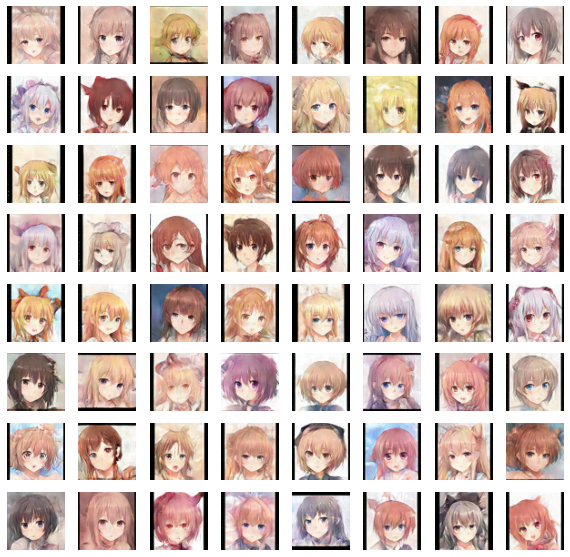

In [ ]:
import torch
from GANime.gan import GAN

#initialize new model with random weights
seed_size=128
new_gan_model = GAN(seed_size)
#load model trained for 100 epochs
new_gan_model.gen.load_state_dict(torch.load('GANime/example_models/gen.pt'))
new_gan_model.dis.load_state_dict(torch.load('GANime/example_models/dis.pt'))
#infer generation
generated_images = new_gan_model.generate(num_rows=8,
               num_cols=8,
               plot=True,
               device='cpu',
               return_noise=False
              )

# Checkpoint ท้ายบท

## คำถามชวนคิดเกี่ยวกับบทเรียน

1. คุณคิดว่าปัญหาที่คุณกำลังจะแก้ด้วย ML นั้นปริมาณและคุณภาพของข้อมูลที่ใช้เทรน (Data-Centric AI) หรือประสิทธิภาพของโมเดล (Model-Centric AI) สำคัญกว่ากัน เพราะอะไร

2. คุณคิดว่า open data และ open source มีข้อดี-ข้อเสียอย่างไรต่อ 1) ผู้สร้างผลงาน 2) ผู้นำผลงานไปใช้ 3) ชุมชน 4) สังคมโดยรวม

3. คุณคิดว่าการใช้ข้อมูลสาธารณะจากเว็บไซต์ต่างๆมาเทรนโมเดลมีข้อควรระวังอะไรบ้าง

4. การเทรนโมเดลด้วยข้อมูลที่สร้างขึ้นมาจากอีกโมเดลหนึ่ง ("ข้อมูลปลอม") นั้นมีข้อดี-ข้อเสียอย่างไรบ้าง

## สิ่งที่ควรเตรียมพร้อมสำหรับทำโครงงาน

### ☑️ ทบทวนระบบการให้คะแนนโครงงานให้เรียบร้อย

AI Builders จะออกใบประกาศนียบัตรจบการศึกษาให้กับผู้เข้าร่วมโครงการที่ส่งโครงงานได้คะแนนอย่างน้อย 70 จาก 100 คะแนนตามเกณฑ์ต่อไปนี้เท่านั้น

1. problem statement; เหตุผลในการแก้ปัญหาเชิงธุรกิจ/ชีวิตประจำวันด้วย machine learning - 15 คะแนน
2. metrics and baselines; การให้เหตุผลเชื่อมโยงการแก้ปัญหากับตัวชี้วัดที่เลือก / การวัดผลเทียบกับวิธีแก้ปัญหาในปัจจุบัน - 15 คะแนน

**วันนี้เราจะคิดถึง 2 ข้อนี้เป็นพิเศษ**

**3. data collection and cleaning; การเก็บและทำความสะอาดข้อมูล - 15 คะแนน**


**4. exploratory data analysis; การทำความเข้าใจข้อมูล - 20 คะแนน**


5. modeling, validation and error analysis; การทำโมเดล, ทดสอบโมเดล และวิเคราะห์ข้อผิดพลาดของโมเดล - 20 คะแนน
6. deployment; การนำโมเดลไปใช้แก้ปัญหาจริง - 15 คะแนน

### ☑️ หาข้อมูลมาจากไหนดี

จากแหล่งข้อมูลทั้งหมดที่กล่าวมาในบทเรียนนี้ คุณคิดว่าจะหาชุดข้อมูลจากไหนมาเทรนโมเดล

### ☑️ คุณภาพของข้อมูล Labels และ Inputs

ข้อมูลที่คุณได้มาจากอินเตอร์เน็ตไม่ว่าจะดาวน์โหลดชุดข้อมูลของคนอื่น, scrape เว็บไซต์, ใช้โมเดลคนอื่นสร้างขึ้นมา คุณต้องทำให้แน่ใจว่าคุณภาพมันพร้อมใช้งานทั้ง Labels และ Inputs เช่น ถ้าอยากทำโมเดลแปลภาษาไทย-จีนก็ต้องทำให้แน่ใจว่าคู่ประโยคที่เราหามามันแปลตรงกันจริงๆ เป็นต้น

### ☑️ Train-validation-test Splits สมเหตุสมผลไหม

ใช้สามัญสำนึกและตรรกะในการแบ่งข้อมูลเป็น train, validation, test sets ทำให้มั่นใจว่าไม่มีตัวอย่างเดียวกันหลุดไปใน set อื่น เช่น 

* ในการทำ face recognition ไม่ควรมีรูปคนๆเดียวกันในมากกว่า 1 set

* หากทำ time series forecasting เรียงข้อมูลจากเก่าสุดไปใหม่สุดใน `train`, `validation` และ `test` เพื่อไม่ให้โมเดลเห็นข้อมูลจากอนาคต

* หากทำ product recommendation ไม่ควรมีข้อมูลของลูกค้าคนเดียวกันในมากกว่า 1 set เพราะจะทำให้เราเดาว่าเขาเป็นลูกค้าประเภทไหนได้ด้วยข้อมูลที่ไม่ควรเห็น ฯลฯ 

ทั้งนี้ขึ้นอยู่กับวิจารณญาณของผู้สร้างโมเดล เรียนรู้เพิ่มเติมเกี่ยวกับการ split ข้อมูลได้จาก เรียนรู้เพิ่มเติมเกี่ยวกับ metric ได้จาก [DS&AI Academy](https://www.youtube.com/playlist?list=PL1kutgc5YvC841TmatsLuj4sDKkwj95Dz)